<img src="images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Entanglement Purification: The BBPSSW Protocol
***


## Summary and Outline
***
In this tutorial we demonstrate the use of IBM Qiskit by implementing entanglement purification. This technique from quantum information processing, which is especially required for quantum communication, allows to generate highly-entangled qubit pairs from noisy sources. In the purification protocol presented below, we will use two entangled qubit pairs to create a single pair with an increased amount of entanglement.

In **Part I** we will first give a very brief introduction to entanglement purification itself. We present the necessary details to this topic in a depth, so that we understand the following implementation in Qiskit with this knowledge.

In **Part II** we give a detailed description of how to implement the entanglement purification protocol in Qiskit. We focus on explaining the necessary steps in detail and providing a comprehensive description of the use of Qiskit. The presented contents include the creation of quantum circuits from single- and two-qubit gates, the implementation of quantum measurements and the visualization of quantum circuits. Furthermore, we present how to use the tomography functions integrated in Qiskit to perform quantum state tomography, which is necessary to demonstrate the functioning of entanglement purification.

After we have generated the quantum circuit for entanglement purification, we will perform a simulation of this circuit with the built-in quantum simulator of Qiskit in **Part III**. We show how the density matrix of the qubit pair for which we want to increase the entanglement can be reconstructed step by step from the simulation results. In order to verify the correctness of our Qiskit implementation of the purification protocol, we compare the simulation results with exact calculations.

The simulation in Part III is based on a perfect quantum computer. In **Part IV** we extend this simulation and account for imperfections in the setup. Through the IBM Q Experience, we will read the properties of a real IBM Q device, such as gate and measurement accuracy, and relaxation and decoherence rates. From these properties we will show how to create a simple noise model with the help of integrated Qiskit functions, which can then be used in the simulation. From the simulation results, we will again reconstruct the density matrix of our entangled qubit pair and we can gain a first impression of how well purification could work on a real device.

Finally, in **Part V**, we will run the purification protocol on a real IBM Q device. We show how to access such a device through the IBM Q Experience and execute the quantum circuit for entanglement purififcation that we have previously constructed. As in the previous parts, we will reconstruct the density matrix of the real qubit pair and check whether the entanglement can be increased.

In the last part, **Part VI**, we will summarize our results and propose further steps that could logically extend this tutorial.


## Learning Objectives
***

We give a comprehensive explanation of the following basic features of Qiskit and the IBM Q Experience:

* Composition of quantum circuits from single- and two-qubit gates
* Generation of parametrized quantum circuits
* Implementation of qubit measurements
* Execution of quantum circuits using the simulator integrated in Qiskit
* Execution of quantum circuits on real IBM Q devices using the IBM Q Experience
* Extraction of measurement results

In addition, we explain more advanced uses of Qiskit and the topics are:

* Performance of quantum state tomography
* Postprocession of measurement results for conditional quantum state tomography
* Extraction of noise parameters from real devices using the IBM Q Experience
* Creation of simple noise models
* Simulation of noisy systems using Qiskit's integrated simulator
* Calculation of an ensemble average over many quantum systems

We also give an introduction to entanglement purification and explain the associated quantum protocol, which we will implement step by step in Qiskit. However, our main focus is on the use of Qiskit and we refer readers interested in in-depth explanations of entanglement purification to the references we provide.


## Prior Knowledge
***

To understand the tutorial, the following topics from the field of quantum information theory are required:

* Common single- and two-qubit gates
* Qubit entanglement or the notion of maximal entanglement
* Bell states
* Mixed quantum states and density matrices
* Quantum state fidelity

The following topics are helpful, but not absolutely necessary, to work through this tutorial:

* Quantum state tomography

Since this tutorial is provided as Jupyter notebook, basic knowledge of the following Python libraries is recommended:

* NumPy


## Contents
***
* **Part I: Introduction to Entanglement Purification and the BBPSSW Protocol**
  * 1.1 Concept
  * 1.2 Quantum Protocol
  
  
* **Part II: Implementation of Quantum Circuit for BBPSSW Protocol in Qiskit**
  * 2.1 Basic Code Imports
  * 2.2 Definitions
  * 2.3 Quantum Register and Quantum Circuit
    * 2.3.1 Quantum Register
    * 2.3.2 Circuit for Initialization of Source State
    * 2.3.3 Implementation of Twirl Operation by Random Bilateral Rotation
    * 2.3.4 Interchange of the $|\Psi^-\rangle$ and the $|\Phi^+\rangle$ components
    * 2.3.5 Application of Bilateral CNOT Gate
    * 2.3.6 Concatenation of Quantum Circuits
  * 2.4 (Conditional) Quantum State Tomography
  
  
* **Part III: Simulation of the BBPSSW Protocol using Qiskit**
   * 3.1 Single Quantum System
   * 3.2 Ensemble Average
     * 3.2.1 Definition of Auxiliary Functions
     * 3.2.2 Simulation


* **Part IV: Including Noise in the Simulation Model**
  * 4.1 IBM Q Account
  * 4.2 Creation of Noise Model in Qiskit
  * 4.3 Simulation Including Noise
    * 4.3.1 Initial State and Initial Fidelity
    * 4.3.2 Entanglement Purification in the Presence of Noise


* **Part V: Entanglement Purification on a Real IBM Q Device**
  * 5.1 IBM Q Experience
    * 5.1.1 Job Status and Device Queue
    * 5.1.2 Personal Credits
  * 5.2 Initial State and Initial Fidelity
  * 5.3 Execution of Entanglement Purification on a Real Device


* **Part V: Conclusion and Outlook**

# Part I: Introduction to Entanglement Purification and the BBPSSW Protocol
***

## 1.1 Concept

The concept of **entanglement purification** has been introduced by C. H. Bennett *et al.* [1]. Named after the authors, the original protocol is also referred to as the **BBPSSW protocol**. The basic idea of entanglement purification is to create a (near-)maximally entangled Bell state by distilling entanglement from a larger number of qubit pairs that are not maximally entangled. For this reason, this concept is also known as **entanglement distillation**. Since purification usually has to be carried out by two remote parties, only local operations, measurements and classical two-way communication are permitted. 

Many applications of quantum information processing, such as quantum teleportation [?] or entanglement-based quantum cryptography [?], utilize the maximally entangled *Bell states* states

$$ |\Phi^{\pm}\rangle = \frac{1}{\sqrt{2}}(|00\rangle \pm |11\rangle), \\
|\Psi^{\pm}\rangle = \frac{1}{\sqrt{2}}(|01\rangle \pm |10\rangle). $$

The feasibility or security of these protocols depends on the "quality" of the available Bell states. However, real sources of entangled qubit pairs and lossy quantum channels will most likely produce imperfect Bell states due to preparation errors or imperfect qubit transmission. The aim of entanglement purification is to compensate precisely for this degradation and restore a maximally-entangled Bell state.

In the beginning, we assume a source of entangled qubit pairs, which produces two-qubit states $\rho_\textrm{S}$ with some **state fidelity** $F$ towards the maximally-entangled Bell state $|\Psi^-\rangle$,

$$
F = \langle \Psi^- | \rho_\textrm{S} | \Psi^- \rangle.
$$

As it was explained above, the imperfection could come from the production process itself or from the transmision of the qubits through lossy quantum channels.

Now the two parties that each hold one of the qubits of the state $\rho_\textrm{S}$ produced by the source are conveniently named Alice and Bob. The scanerio shall be depicted by the following image:

<img src="images/placeholder.png" width="250 px">


The fundamental idea of the BBPSSW protocol [1] is that Alice and Bob take two copies of the state $\rho_\textrm{S}$ and locally perform specific quantum operations on their qubits to eventuelly produce a single two-qubit state with larger fidelity $F' > F$. If this can be achieved, the procedure can be iterated to produce even larger fidelities and eventually obtain a maximally entangled Bell state $| \Psi^- \rangle$. 

So in the following, we will explain how Alice and Bob can achieve this and increase the entanglement of the state $\rho_\textrm{S}$.

## 1.2 Quantum Protocol

#### Step 1: Creation of a Werner state by a Random Bilateral Rotation

From the two-qubit state $\rho_\textrm{S}$, the two parties Alice and Bob first need to create a so-called **Werner state** $W_F$,

$$
W_F = F |\Psi^-\rangle \langle \Psi^-| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Phi^+\rangle \langle \Phi^+|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$

Such a state is diagonal in the Bell basis $\{ |\Phi^{+}\rangle, |\Phi^{-}\rangle, |\Psi^{+}\rangle, |\Psi^{-}\rangle \}$, has fidelity $F$ towards the Bell state $|\Psi^-\rangle$, and equal overlaps $(1-F)/3$ with the other three Bell states. 

Alice and Bob can achieve this by the application of a so-called **twirl** [2]. Such an operation keeps the component of $\rho_\textrm{S}$ towards the state $|\Psi^-\rangle$, it equalizes the components towards the other three Bell states, and it removes all off-diagonal elements. 

Alice and Bob can implement the twirl by using bilateral operations $B_i (i \in \{x, y, z\})$ that rotate each qubit of the pair by an angle of $\pi/2$ around the $i$ axis. Choosing randomly from the following set $\{ U_i \}$ of combinations of bilateral rotations,

$$
\{U_i\}
=
\{
I,  B_x B_x,  B_y B_y,  B_z B_z, \\
B_x B_y,  B_y B_z,  B_z B_x,  B_y B_x, 
\\ B_x B_y B_x B_y,  B_y B_z B_y B_z,  B_z B_x B_z B_x,  B_y B_x B_y B_x
\},  
$$  

the state $\rho_\textrm{S}$ will be transformed into the average

$$
W_F = \frac{1}{12} \sum_{i=1}^{12} U_i^\dagger \rho_\textrm{S} U_i,
$$

which will exactly be the desired Werner state $W_F$. Here, $I$ denotes the identity operation. An intuitive explanation of the twirl, coming from molecular physics, can be found in Ref. [2] and shall not be part of this introduction.

In a realistic scenario, Alice and Bob need to choose randomly from the set $\{ U_i \}$ and on average will create the state $W_F$. In the later implementation in Qiskit, we will therefore perform several runs of the purification protocol and always choose randomly from the set $\{ U_i \}$ to represent a realistic scenario as well.

So far, the circuit of quantum oprations that will be performed on the qubits looks like this:

<img src="images/placeholder.png" width="250 px">

#### Step 2: Interchange of the $|\Psi^-\rangle$ and the $|\Phi^+\rangle$ components

After Alice and Bob prepared the state $W_F$, one of the parties rotates its qubit by an angle of $\pi$ about the $y$ axis, which corresponds to the application of a $Y$ gate,

$$
Y = 
\begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}.
$$

The effect of such a unilateral rotation is to interchange the components of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ in the Werner state $W_F$. Therefore, the operation creates a state $\rho_F$,

$$
\rho_F = F |\Phi^+\rangle \langle \Phi^+| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Psi^-\rangle \langle \Psi^-|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$  

(Overall phases have been omitted here.)

We assume that Alice performs this unilateral rotation, so the circuit of the protocol to this point therefore looks like this:

<img src="images/placeholder.png" width="250 px">


#### Step 3: Application of Bilateral CNOT Gate

Now that Alice and Bob can prepare states $\rho_F$ from the source states $\rho_\textrm{S}$, they will take two copies of $\rho_F$ to increase the entanglement of one of the states.

The two parties perform a so-called bilateral CNOT gate on the two qubit pairs $\rho_F$. I.e. Alice and Bob each perfom a CNOT gate between the two qubits they hold locally. In doing so, a qubit from the first pair serves a control qubit in the local CNOT operation, whereas the respective qubit from the second pair serves a target qubit. Remember that in a CNOT gate the state of the target qubit is flipped if and only if the source qubit is in state $|1\rangle$.

The quantum circuit on the four qubits looks like this:

<img src="images/placeholder.png" width="250 px">

#### Step 4: Measurement of Target Qubits

As final step, Alice and Bob measure the target qubits in the computational basis $\{|0\rangle, |1\rangle \}$:

<img src="images/placeholder.png" width="250 px">

After they performed the measurements, Alice and Bob compare their results. In case that both measurement outcomes are equal, i.e. 00 or 11, the purification was successful and the control qubits will be kept. Otherwise, they will be discarded.

To see that the purification process is successful in the case where the measurements yield equal outcomes, one needs to calculate the fidelity $F'$ of the resulting state of the control qubits, which we will call $\rho'_{F'}$,

$$
F' = \langle \Phi^+ | \rho'_{F'}| \Phi^+ \rangle.
$$

(Note: The state $\rho'_{F'}$ does not have the same form as $\rho_{F}$.)

We will not elaborate the calculation of $\rho'_{F'}$ in this introduction since it is not required for the implementation in Qiskit, but will only give the result for $F'$ [1],

$$
F' \equiv F'(F) = \langle \Phi^+ | \rho'_{F'}| \Phi^+ \rangle = \frac{F^2 + \frac{1}{9}(1-F)^2}{F^2 + \frac{2}{3}F(1-F) + \frac{5}{9}(1-F)^2}.
$$

Since the function $F'(F)$ will be needed at several points in this tutorial, we define the corresponding function `output_fidelity`:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def output_fidelity(F_in):
    """ Returns output fidelity of BBPSSW protocol.
    
    Keyword arguments:
    F_in -- input fidelity
    """
    F_out = (np.square(F_in) + np.square(1-F_in)/9) \
            / (np.square(F_in) + 2*F_in*(1-F_in)/3 + 5*np.square(1-F_in)/9)
 
    return F_out

The new fildelity $F'$ is larger than the original fidelity for $1/2 < F < 1$:

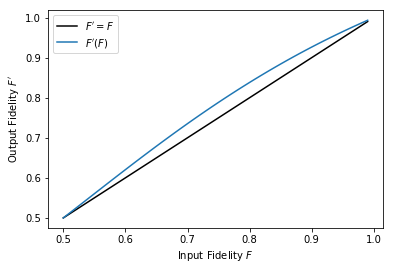

In [3]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

So if the input fidelity $F$ of the source state $\rho_\textrm{S}$ is greater than 1/2, Alice and Bob can distill entanglement from two copies of that state. By iterating the procedure of the BBPSSW protocol described above, the fidelity of the two-qubit states can be increased arbitrarily close to 1, which corresponds to a maximally-entangled Bell state.

#### Step 5: Restoration of Werner State

Note that the state $\rho'_{F'}$ is usually not of the form of $\rho_{F}$, i.e. it can contain off-diagonal elements in the Bell basis and the components of $|\Phi^{-}\rangle$, $|\Psi^{+}\rangle$, and $|\Psi^{-}\rangle$ are not equal. But to perform a subsequent round of purification, we have to bring $\rho'_{F'}$ into the form of $\rho_{F}$, i.e. we have to create the state $\rho_{F'}$,

$$
\rho_{F'} = F' |\Phi^+\rangle \langle \Phi^+| + \frac{1-F'}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Psi^-\rangle \langle \Psi^-|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$  

Therefore, in the state $\rho'_{F'}$ the components of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ are interchanged again using a unilateral $Y$ gate (cf. Step 2) and another twirl operation is performed to create a Werner state $W_{F'}$,

$$
W_{F'} = F' |\Psi^-\rangle \langle \Psi^-| + \frac{1-F'}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Phi^+\rangle \langle \Phi^+|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$

This state can now serve as a starting point of new round of entanglement purification.

In the following implementation in Qiskit, we will shorten the purification protocol and leave out Step 5. Since we only want to perform a single round of purification, we do not convert the state of the control qubits back to Werner form after the target qubits have been measured. Instead, we will directly evaluate the fidelity of the control qubits towards the Bell state $| \Phi^+ \rangle$, since we know that

$$
\langle \Phi^+ | \rho'_{F'}| \Phi^+ \rangle = F' = \langle \Psi^- | W_{F'}| \Psi^- \rangle,
$$

because the twirl operation leaves the $| \Psi^- \rangle$-component unchanged.

# Part II: Implementation of Quantum Circuit for BBPSSW Protocol in Qiskit
***

## 2.1 Basic Code Imports

To use Qiskit in this initial part of the tutorial, in which we create a quantum circuit for the BBPSSW protocol, we must first import the necessary base code from the Qiskit module:

In [4]:
# import Qiskit
#from qiskit import Aer, IBMQ, QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# import Parameter class
from qiskit.circuit import Parameter

# import useful additional packages 
from qiskit.tools.visualization import plot_state_city
from qiskit.quantum_info import state_fidelity

To implement the random bilateral rotation of Step 1 in the BBPSSW protocol, we predefined a helper function `bilateral_rotation`:

In [5]:
#from lib.functions import bilateral_rotation

All steps in this function can be understood with the explanations in the tutorial.

Furthermore, we need the external library `deepcopy` and we use the constant $\pi$ from the `math` library:

In [6]:
from copy import deepcopy
from math import pi

## 2.2 Definitions

As described in Part I, in order to demonstrate entanglement purification, the fidelity of quantum states towards the maximally-entangled Bell states must be calculated. This calculation is later performed with an integrated Qiskit function that returns the fidelity between two states when they are given as numpy arrays. 

We therefore define the four Bell states in the basis $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$ as numpy arrays:

In [7]:
phi_plus = np.array([1, 0, 0, 1])/np.sqrt(2)   # | Phi^+ >
phi_minus = np.array([1, 0, 0, -1])/np.sqrt(2) # | Phi^- >
psi_plus = np.array([0, 1, 1, 0])/np.sqrt(2)   # | Psi^+ >
psi_minus = np.array([0, 1, -1, 0])/np.sqrt(2) # | Psi^- >

**Possibly as an exercise.**

We will also need to check how good we can initialza a Werner state, so we define a function `Werner_state` that returns a Werner state with a given fidelity $F$:

In [8]:
def Werner_state(F):
    """Returns Werner state of fidelity F.
    
    Keyword arguments:
    F -- fidelity of Werner state, range [0, 1]
    """
    if F < 0 or F > 1:
        raise Exception('Fidelity must be between 0 and 1.')
    
    state = F*np.outer(psi_minus, psi_minus.conj().T) \
    + (1 - F)/3*(np.outer(phi_plus, phi_plus.conj().T) \
                         + np.outer(phi_minus, phi_minus.conj().T) \
                         + np.outer(psi_plus, psi_plus.conj().T))
    
    return state

## 2.3 Quantum Register and Quantum Circuit

In this section, we describe how to implement the quantum circuit for entanglement purififcation in Qiskit. For clarity, we divide the quantum circuit into its individual parts. First we have to simulate the source of entangled qubits and create two pairs of qubits in the state $\rho_\textrm{S}$. We then continue to integrate Steps 1 (Random Bilateral Rotation) to 3 (Bilateral CNOT gate).

### 2.3.1 Quantum Register

The BBPSSW protocol works on two entangled qubit pairs. To implement this protocol, we therefore need a quantum register of four qubits, on which our to be defined quantum circuit will run on. 

In Qiskit, a quantum register is an instance of the class `QuantumRegister` and we can create a register of four qubits in the following way:

In [9]:
# This creates a quantum register qr consisting of four qubits
qr = QuantumRegister(4)

### 2.3.2 Circuit for Initialization of Source State

Our aim is to simalute a source that produces entangled qubits states $\rho_\textrm{S}$ that have an initial fidelity $F > 1/2$. Remember that such a high fidelity is required for the purification protocol to work.

To achieve this, we are going to implement a quantum circuit that creates the following state $|\psi_\textrm{S} \rangle$ between two qubits,

$$
|\psi_\textrm{S}\rangle = \cos\left(\frac{\theta}{2}\right) |01\rangle - \sin\left(\frac{\theta}{2}\right) |10\rangle ,
$$

the two amplitudes being parametrized by an angle $\theta$ ($- \pi/2 < \theta < \pi/2$). From the state $|\psi_\textrm{S} \rangle$, we can calculate the state $\rho_\textrm{S} = |\psi_\textrm{S}\rangle\langle \psi_\textrm{S} |$,

$$
\rho_\textrm{S} = |\psi_\textrm{S}\rangle\langle \psi_\textrm{S} |
=
\cos^2\left(\frac{\theta}{2}\right) |01\rangle \langle 01|
-
\cos\left(\frac{\theta}{2}\right)\sin\left(\frac{\theta}{2}\right) 
\left( |01\rangle\langle 10| + |10\rangle\langle 01| \right)
+
\sin^2\left(\frac{\theta}{2}\right) |10\rangle \langle 10|.
$$

The fidelity of $\rho_\textrm{S}$, i.e. the initial fidelity $F$, is then given by

$$
F \equiv F(\theta) = \langle \Psi^- | \rho_\textrm{S} | \Psi^- \rangle  = \frac{1}{2} \left( \sin(\theta) + 1 \right).
$$

We define a function `F_to_theta` that returns the angle $\theta$ for a given fidelity $F$, since we are going to need this calculation a few times within the tutorial:

In [10]:
def F_to_theta(F):
    """Returns the angle theta corresponding to an input Fidelity F.
    
    Keyword arguments:
    F -- fidelity between 0 and 1
    """
    if F < 0 or F > 1:
        raise Exception('Keyword argument must be between 0 and 1.')
    else:
        theta = np.arcsin(2*F - 1)
    
    return theta

In Qiskit, quantum circuits are objects of the `QuantumCircuit` class. We can create an instance of this class in the following way:

In [11]:
# This creates a quantum circuit on the quantum register qr
source_circ = QuantumCircuit(qr)

`source_circ` will eventually generate the state $|\psi_\textrm{S}\rangle$ respectively between two qubit pairs in the quantum register `qr`, but is an empty quantum circuit so far since we didnt't introduce any quantum gates. Using the method `draw`, circuits can be nicely visualized and we can get a better idea of what our circuit does:

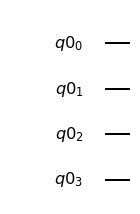

In [12]:
source_circ.draw(output='mpl')

We can nicely see how the quantum register `qr` is made-up from the four qubits $q0_0$ to $q0_3$. (q0 is actually the name of the register itself.) Note that the labelling starts with the index 0 in accordance to indexing in Python.

In accordance with the figures in Part I, we assume qubit 0 ($q0_0$) and qubit 1 ($q0_1$) being the first entangled qubit pair that serves as control pair, and Alice holds qubit 0, Bob qubit 1. In the following, we show how to bring the control pair into the state $|\psi_\textrm{S}\rangle$. The implementation for the target pair will be left as an exercise.

By default, all qubits are initialized to the state $|0\rangle$, i.e. the state $|\psi_\textrm{control}\rangle$ of the control pair is 

$$
|\psi_\textrm{control}\rangle = |0\rangle_{0} |0\rangle_{1},
$$

where the subscript should denote the qubit. As first step, we flip qubit 1 using a Pauli-$X$ gate,

$$
X = 
\begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}.
$$

In Qiskit, a Pauli-$X$ gate can be implemented in a quantum circuit using the method `x` of the`QuantumCircuit` class:

In [13]:
# This implements a Pauli-X gate on qubit 1
source_circ.x(qr[1]);

Each qubit $i$ in the register can called adressed using `qr[i]`. So `x(qr[1])` implements an $X$ gate on qubit 1. Drawing the quantum circuit again, we can see that a single-qubit gate $X$ is applied to qubit $q0_1$:

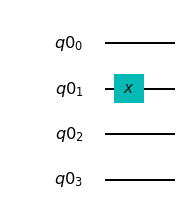

In [14]:
source_circ.draw(output='mpl')

After the application of the $X$ gate, the state of the control pair is

$$
|\psi_\textrm{control}\rangle = |0\rangle_{0} |1\rangle_{1}.
$$

Next, to qubit 0 we apply a specific single-qubit gate from the general rotation $u3(\theta, \phi, \lambda)$, 

$$
u3(\theta, \phi , \lambda) = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

namely

$$
u3(\theta, \phi = \pi , \lambda = 0) = \begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
-\sin(\theta/2) & -\cos(\theta/2) \\
\end{pmatrix},
$$

to create the state 

$$
|\psi_\textrm{control}\rangle = \cos\left(\frac{\theta}{2}\right) |0\rangle_{0} |1\rangle_{1} - \sin\left(\frac{\theta}{2}\right) |1\rangle_{0} |1\rangle_{1}.
$$

The rotation is implemented using the method `u3`:

In [15]:
# This creates a parameter theta
theta = Parameter('theta')

# This implements a parametrized single-qubit gate u3 on qubit 0
source_circ.u3(theta, pi, 0, qr[0]);

Later in this tutorial, we want to perform entanglement purification for various input fidelities $F$, i.e. for different values of $\theta$. Therefore we defined a parameter called `theta`, which is an instance of the class `Parameter` and to which a value can be assigned when the quantum circuit will be executed. The input parameters of the method `u3` are the angles $\theta$, $\phi$ and $\lambda$, and the qubit on which the gate is applied. When we draw the circuit, we can now see another single qubit operation $U_3$ that is applied to qubit $q0_0$:

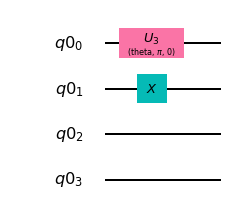

In [16]:
source_circ.draw(output='mpl')

Now, we need to apply a CNOT gate between qubit 0 (control qubit) and qubit 1 (target qubit), where qubit 1 is flipped if qubit 0 is in state $|1\rangle$. This will create the desired state $|\psi_\textrm{S}\rangle$,

$$
|\psi_\textrm{control}\rangle =
|\psi_\textrm{S}\rangle =
\cos\left(\frac{\theta}{2}\right) |0\rangle_{0} |1\rangle_{1} - \sin\left(\frac{\theta}{2}\right) |1\rangle_{0} |0\rangle_{1}.
$$

In Qiskit, a CNOT gate can be added to a quantum circuit using the method `cx` that takes the control and the target qubit as input arguments:

In [17]:
# This implements a CNOT between qubit 0 as control qubit and qubit 1 as target qubit
source_circ.cx(qr[0], qr[1]);

The complete quantum circuit that simulates a source of entangled qubit pairs and creates the state $|\psi_\textrm{S}\rangle$ between qubits $q0_0$ and $q0_1$ is:

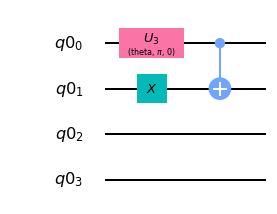

In [18]:
source_circ.draw(output='mpl')

Since we need two copies of the state $\rho_\textrm{S}$ to perform entanglement purification, we also need to bring qubits 2 and 3 into the state $|\psi_\textrm{S}\rangle$,

$$
|\psi_\textrm{target}\rangle =
|\psi_\textrm{S}\rangle =
\cos\left(\frac{\theta}{2}\right) |0\rangle_{2} |1\rangle_{3} - \sin\left(\frac{\theta}{2}\right) |1\rangle_{2} |0\rangle_{3}.
$$

We call this state $|\psi_\textrm{target}\rangle$ since the two qubits will serve as target pairs of the BBPSSW protocol.

> **Exercise 1**  
Add the necessary quantum gates to the circuit `source_circ` such that the state $|\psi_\textrm{S}\rangle$ will be created between qubits 2 and 3. The implementation should be done in analogy to the steps above to create this state between the control qubits.

In [19]:
# This implements a Pauli-X gate on qubit 3
source_circ.x(qr[3])
# This implements a single-qubit gate u3 on qubit 2
source_circ.u3(theta, pi , 0, qr[2])
# This implements a CNOT between qubit 2 as control qubit and qubit 3 as target qubit
source_circ.cx(qr[2], qr[3])

You can check your solution to Exercise 1 by drawing the circuit `source_circ` and the two parts that create the state $|\psi_\textrm{S}\rangle$ between the control and the target qubits, respectively:

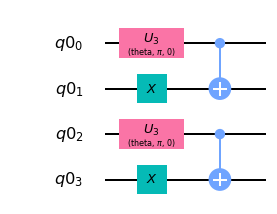

In [20]:
source_circ.draw(output='mpl')

A single-qubit rotation $U_3(\textrm{theta}, \pi, 0)$ should be applied to qubit $q0_2$, an $X$ gate to qubit $q0_3$, and a CNOT between the two.

To be clear on which qubits serve as control pair and which qubits as target pair of the BBPSSW protocol, we define the two arrays `control_qubits` and `target_qubits`, that contain the respective qubits:

In [21]:
control_qubits = [qr[0], qr[1]]
target_qubits = [qr[2], qr[3]]

### 2.3.3 Implementation of Twirl Operation by Random Bilateral Rotation

To implement the twirl operation, we create another instance of a quantum circuit that performs the random bilateral rotation that was explained in **Step 1** of Section 1.2:

In [22]:
# This creates a new quantum circuit instance
twirl_circ = QuantumCircuit(qr)

Just as a reminder, to implement the twirl, Alice and Bob choose randomly from the set $\{U_i\}$ of 12 bilateral operations, and apply the corresponding rotations locally to their qubit.

To implement an operation that is randomly chosen from $\{U_i\}$, we define a helper function `bilateral_rotation`. This function has the following input arguments:
* `circuit`: The instance of a quantum circuit to which the rotations will be added.
* `qubits`: An array of qubits of which each will be rotated.
* `rot_idx`: An integer that enumerates the rotations of the $\{U_i\}$. E.g. `rot_idx = 0` corresponds to the identity operation, `rot_idx = 1` corresponds $B_x B_x$, and so on.

In [23]:
def bilateral_rotation(circuit, qubits, rot_idx):
    """Adds a bilateral rotation to a quantum circuit.
    
    Keyword arguments:
    circuit --  quantum circuit to which the rotation is added
    qubits -- array of qubits on which the rotations are performed
    rot_idx -- integer that enumerates the rotations from the set of all rotations, ranges from 0 to 11
    """
    for qubit in qubits:
        if rot_idx == 0:
            #circuit.iden(qubit)
            pass
        elif rot_idx == 1:
            circuit.rx(pi/2, qubit)
            circuit.rx(pi/2, qubit)
        elif rot_idx == 2:
            circuit.ry(pi/2, qubit)
            circuit.ry(pi/2, qubit)
        elif rot_idx == 3:
            circuit.rz(pi/2, qubit)
            circuit.rz(pi/2, qubit)
        elif rot_idx == 4:
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
        elif rot_idx == 5:
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
        elif rot_idx == 6:
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
        elif rot_idx == 7:
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
        elif rot_idx == 8:
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
        elif rot_idx == 9:
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
        elif rot_idx == 10:
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
        elif rot_idx == 11:
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
        else:
            raise Exception('Input argument rot_idx has to be an integer between 0 and 11.')

Single-qubit rotations about the axes $x$, $y$ and $z$ can be implemented using the methods

* `rx`: Rotation about the $x$ axis.
* `ry`: Rotation about the $y$ axis.
* `rz`: Rotation about the $z$ axis.

The angles of rotation and the respective qubit have to be provided as input arguments. The identity operation, which doesn't rotate the qubit and leaves its state unchanged, can be implemented using the method `iden`.

Remember that the bilateral operations $B_i$, from which the elements of $\{ U_i\}$ are constructed, are rotations about the $i$ axis by an angle of $\pi/2$ and the rotations are applied to both qubits of the entangled pair. With this knowledge it should become clear how the operations in the function `bilateral_rotation` are constructed from single-qubit rotations `rx`, `ry` and `rz`, all about angles of $\pi/2$.

Now we add a random bilateral rotation to the circuit `twirl_circ` using the function `bilateral_rotation`, once for the control qubit pair and once for the target pair:

In [24]:
# This creates a random integer between 0 and 11
random_idx = np.random.randint(12)

# This adds a random bilateral rotation to the circuit, applied to qubits 0 and 1 (control qubits)
bilateral_rotation(twirl_circ, control_qubits, random_idx)

# This adds a random bilateral rotation to the circuit, applied to qubits 2 and 3 (target qubits)
bilateral_rotation(twirl_circ, target_qubits, random_idx)

The circuit `twirl_circ` has the following form:

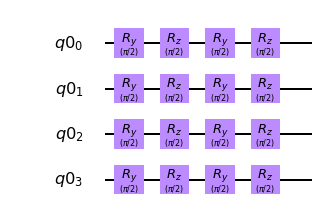

In [25]:
twirl_circ.draw(output='mpl')

If this operation is applied to a large number of qubit pairs in the state $|\psi_\textrm{S}\rangle$, as we can create them by the circuit `source_circ`, on average one obtains two Werner states $W_F$ (cf. Step 1, Section 1.2),

$$
W_F = F |\Psi^-\rangle \langle \Psi^-| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Phi^+\rangle \langle \Phi^+|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$

I.e. on average the control and the target pair, respectively, will be brought into states of Werner form after the circuit `twirl_circ` is applied.

### 2.3.4 Interchange of the $|\Psi^-\rangle$ and the $|\Phi^+\rangle$ components

The next step is for Alice to apply a unilateral $\pi$ rotation about the $y$ axis to her qubits, i.e. the rotations will be applied to one qubit in the control and in the target pair. Such a rotation corresponds to a Pauli-$Y$ gate, i.e. a bit- and a phase-flip gate,

$$
Y = 
\begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}.
$$

Using Qiskit, such a rotation can be applied to a qubit using the method `y` on a circuit.

We create a new quantum circuit called `purification_circ` that implements the unilateral rotations of Alice's qubits:

In [26]:
# This creates a new instance of a quantum circuit
purification_circ = QuantumCircuit(qr)

# This implements a Pauli-Y gate on qubit 0
#purificationCircuit.y(qr[0])
purification_circ.y(control_qubits[0])

# This implements a Pauli-Y gate on qubit 2
#purification_circ.y(qr[2]);
purification_circ.y(target_qubits[0]);

In this quantum circuit, single-qubit operations $Y$ are applied to qubits $q0_0$ and $q0_2$, respectively:

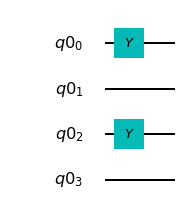

In [27]:
purification_circ.draw(output='mpl')

If the quantum circuit `purification_circ` is applied to two qubit pairs in the Werner state $W_F$, the output will be two qubits pairs in the state $\rho_F$ (cf. **Step 2**, Section 1.2),

$$
\rho_F = F |\Phi^+\rangle \langle \Phi^+| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Psi^-\rangle \langle \Psi^-|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$  

### 2.3.5 Application of Bilateral CNOT Gate

Following the BBPSSW protocol, the final step for Alice and Bob is to implement a bilateral CNOT gate. I.e. Alice and Bob each perform a CNOT gate between the two qubits they hold (**Step 3**, Section 1.2). Remember that in doing so, the qubits from the first pair serve as control qubits (qubits 0 and 1) and the qubits from the second pair act as target qubits (qubits 2 and 3).

> **Exercise 2**  
We already defined the arrays `control_qubits` and `target_qubits` above. Add the bilateral CNOT operation to the circuit `purification_circ` through the implementation of two CNOT gates respectively between elements of `control_qubits` and `target_qubits`.

In [28]:
# This implements a CNOT (controlled-X) gate between control qubit 0 to target qubit 2
#purification_circ.cx(qr[0], qr[2])

# This implements a CNOT (controlled-X) gate between control qubit 0 to target qubit 2
#purification_circ.cx(qr[1], qr[3]);
for i in range(2):
    purification_circ.cx(control_qubits[i], target_qubits[i])

When you draw the circuit `purification_circ`, additionally to the two $Y$ gates you should see two CNOT gates, one between qubits $q0_0$ and $q0_2$, and one between qubits $q0_1$ and $q0_3$:

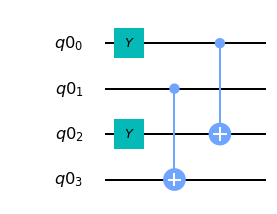

In [29]:
purification_circ.draw(output='mpl')

In the subsequent step of the BBPSSW protocol (**Step 4**, Section 1.2), the target qubits (qubits 2 and 3) should be measured in the computational basis. The measurement results need to be compared in order to verify a successful round of entanglement purification.

We will implement this step during the process of quantum state tomography (Section 2.4), which is described below. It is going to work in such a way that we will only perform state tomography of the control qubits if the outcomes of the measurements on the target qubits are equal.

We would like to point out once again that after the bilateral CNOT gate and the measurement of the target qubits, the control qubit pair must be brought back into Werner form in order to be able to carry out a subsequent round of purification (**Step 5**, Section 1.2). As explained above, this step is not necessary to demonstrate in increase in fidelity and can therefore be omitted for our purposes.

### 2.3.6 Concatenation of Quantum Circuits

In Qiskit it is possible to concatenate quantum circuits by simply adding them. We have split our full circuit for the BBPSSW protocol into the three parts for the initialization of the entangled qubit pairs, the twirl operation and the purification step itself. 

(Note that this was mainly due to pedagogical reasons. We could have implemented all gates in a single qunatum circuit right from the beginning.)

For the purification experiment that will be implemented below, the full circuit is built from three circuits `source_circ`, `twirl_circ`, and `purification_circ` from above:

In [30]:
# This concatenates the three quantum circuits
experiment_circ = source_circ + twirl_circ + purification_circ

Altogether, the complete circuit for the BBPSSW protocol has the following structure:

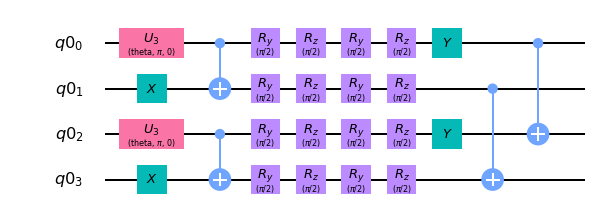

In [31]:
experiment_circ.draw(output='mpl')

## 2.4 (Conditional) Quantum State Tomography

Finally, we want to find out the state $\rho'_{F'}$ of the control qubit pair, i.e. the state of the qubits 0 and 1, so that we can calculate the fidelity $F'$,

$$
F' = \langle \Phi^+ | \rho'_{F'} | \Phi^+ \rangle.
$$

In order to reconstruct the density matrix $\rho'_{F'}$, we can use methods of **quantum tomography**. The library for tomography is part of the Qiskit element **Ignis**, which is a framework for handling noise in quantum circuits. Qiskit Ignis offers methods for the implementation of state and process tomography. However, for the purification protocol we only need to implement **quantum state tomography** and will therefore concentrate on it in this tutorial.

The functions and classes necessary for performing quantum state tomography can be imported from the tomography library:

In [32]:
# import tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In order to perform quantum state tomography, we must first generate tomography circuits with the function `state_tomography_circuits`. From the measurement results of these tomography circuits we can then reconstruct $\rho'_{F'}$ with methods of the fitter class `StateTomographyFitter`.

The tomography circuits themselves consist of the original circuit to which specific gate and qubit measurements are attached. The `state_tomography_circuits` function therefore has the following input arguments:

* `circuit`: Quantum circuit on which the tomography is performed.
* `measured_qubits`: List of qubits from which the quantum state is reconstructed.

In our case we want to reconstruct the state of the control qubits after the execution of the circuit `experiment_circ`, i.e. the desired state tomography circuits can be generated as follows:

In [33]:
# Generate the state tomography circuits
tomography_circs = state_tomography_circuits(experiment_circ, control_qubits)

`tomography_circs` is a list of quantum circuits and from the measurement results of all these circuits the state $\rho'_{F'}$ can be reconstructed.

This is what the first tomography circuit e.g. looks like:

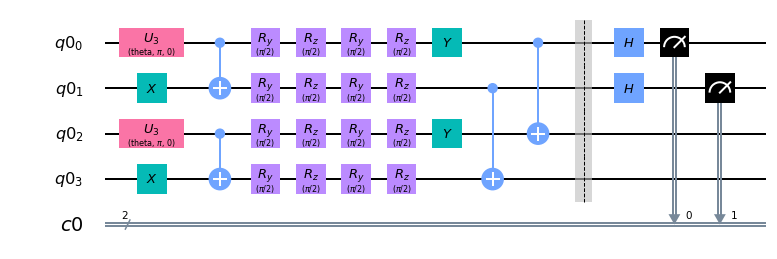

In [34]:
tomography_circs[0].draw(output='mpl')

We can recognize the circuit `experiment_circ` up to the bilateral CNOT gate and see that two additional Hadamard gates are applied to the qubits $q0_0$ and $q0_1$. The control qubits are then measured in the computational basis and the measurement outcomes stored in a classical register $c0$. This classical register was also added in the construction using `state_tomography_circuits` and its size corresponds to the number of qubits from which the quantum state is reconstructed. 

From the execution results of `tomography_circs` we would reconstruct the density matrix of the control qubits in case no measurement is performed on the target qubits. Thus, one can and should rightly remark that **Step 4 (Measurement of Target Qubits)** of the BBPSSW protocol is missing in the quantum circuit `experiment_circ`. Remember that purification only worked if the target qubits were measured and the measurements produced the same results! This is a crucial step, which must also be taken into account here! For this purpose we will perform **conditional quantum state tomography** and adapt a strategy presented in [3] to our needs.

By conditional state tomography, we mean that we perform the tomography only if the target qubits were measured either both in the state $|0\rangle$ or both in the state $|1\rangle$. The method of the fitter class `StateTomographyFitter`, which fits the density matrix of the control qubits, however, requires a set of quantum circuits in the form of the tomography circuits `tomography_circs` as input argument. When we add additional measurements of the target qubits, we need to introduce another classical register to store these measurement results. And in this case we cannot use the fitter directly, because the circuits would contain two classical registers.

What we will do instead is to make a copy of the circuit `experiment_circ`, add the measurements of the target qubits, and create a set of corresponding tomography circuits. These circuits are then actually executed. The results of this execution can then be edited to keep only those cases where the target qubits were measured with the same results. The edited results can then be fed into the fitter along with our original circuits `tomography_circs` to reconstruct the state $\rho'_{F'}$ of the control qubits.

The following shows how to create these ancilla circuits and **Part III** explicitly explains, among other things, how to edit the execution results correctly.

The conditional state tomography is thus implemented as follows. First we make a copy of our original circuit `experiment_circ`:

In [35]:
# This creates a copy of the experiment circuit without measurements
ancilla_circ = deepcopy(experiment_circ)

We call this circuit `ancilla_circ` since it helps to generate the information required to reconstruct $\rho'_{F'}$.

We then add a classical register to `ancilla_circ` which is an instance of the class `ClassicalRegister` to store the results of the target qubits measurement. So we need a two-bit register:

In [36]:
# This creates a classical register cr consisting of two bits
cr = ClassicalRegister(2)

# This adds a claasical register to the circuit
ancilla_circ.add_register(cr)

Next, we need to add the actual measurements of the target qubits. A measurement process can be added to a quantum circuit using the method `measure`. The method uses two input arguments, namely the qubit to be measured and the bit of a classical register to store the measurement result.

The desired measurement of the target qubits is therefore implemented as follows:

In [37]:
# This implements a measurement of qubit 2 and stores the result in bit 0
ancilla_circ.measure(target_qubits[0], cr[0])

# This implements a measurement of qubit 3 and stores the result in bit 1
ancilla_circ.measure(target_qubits[1], cr[1]);

Let's have a look at the circuit `ancilla_circ`:

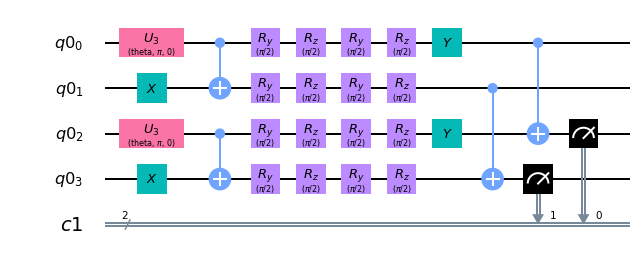

In [38]:
ancilla_circ.draw(output='mpl')

From the circuit diagram we can see that a classic register $c1$ has been added to the circuit `ancilla_circ` compared to the original circuit `experiment_circ` and that the qubits $q0_2$ and $q0_3$ are measured after the bilateral CNOT.

For the circuit `ancilla_circ` we also create tomography circuits `ancilla_tomography_circs` to reconstruct the state of the control qubits:

In [39]:
# Generate the state tomography circuits
ancilla_tomography_circs = state_tomography_circuits(ancilla_circ, control_qubits)

It is now these ancilla circuits `ancilla_tomography_circs` that are actually executed. As an example, we draw one of the ancilla circuits:

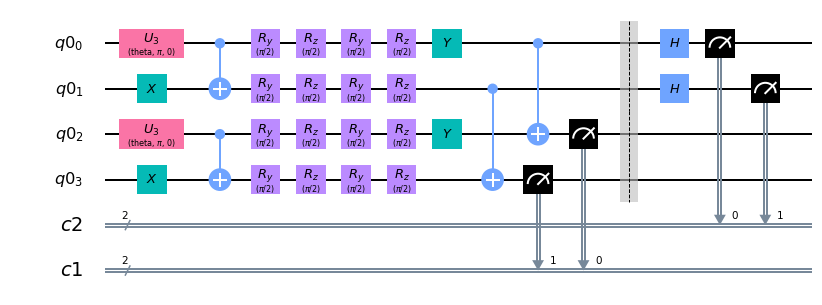

In [40]:
ancilla_tomography_circs[0].draw(output='mpl')

We have already seen that the target qubits $q0_2$ and $q0_3$ are measured in the classical register $c1$. In addition, the results for the tomography of the control qubits $q0_0$ and $q0_1$ are stored in the automatically added classical register $c2$.

At the end of Part II, we are at the point where we have generated all the quantum circuits necessary to implement the full BBPSSW protocol. In the following part we can therefore continue with the simulation of the purification experiment and have our implementation run with the simulator built into Qiskit.

# Part III: Simulation of the BBPSSW Protocol using Qiskit
***

In this part we will simulate the quantum circuit for the BBPSSW protocol. For this we use a simulator, which is integrated in Qiskit. In the first section, we simulate the BBPSSW protocol on a single quantum system. To eventually demonstrate the purification, we calculate an average over many quantum systems to approximately create the state $\rho'_{F'}$ and extract the purified fidelty $F'$.

To execute a quantum circuit in Qiskit, we have to choose a backend on which to run the quantum program. Such a backend can either be a simulator or a real IBM Q device.

The QASM simulator is part of the Qiskit element **Aer** and to use it, we need to import the following libraries:

In [41]:
from qiskit import Aer, execute

To choose the simulator as the backend on which to run the quantum circuit, we use the method `get_backend`:

In [42]:
# This provides the QASM simulator backend
backend_QASM = Aer.get_backend('qasm_simulator')

## 3.1 Single Quantum System

In the following, we are first going to run the circuits `tomography_circs` and reconstruct the density matrix for the control qubits. This is basically done for pedagocial reasons to introduce the working principle of the class `StateTomographyFitter`. After that we run the ancilla circuits `ancilla_tomography_circs` and explain how to edit the execution results in order to be able to use the fitter.

We can run a quantum circuit using the function `execute`, which takes as input arguments:
* `circuits`: A single quantum circuit or a list of quantum circuits to be executed.
* `backend`: The backend to execute the circuits on.
* `shots`: Number of repeated executions of each circuit.
* `parameter_binds`: List of parameter-value pairs (given as python dictionary) that bind the parameters to specific values.

To run a simulation of the circuits `tomography_circs` with an input fidelity of for example $F=0.75$ we can run the following code:

In [43]:
# This executes the tomography circuits
job = execute(tomography_circs, backend_QASM, shots=512, parameter_binds=[{theta: F_to_theta(0.75)}])

Here the parameter $\theta$ is bound to the value corresponding to a fidelity of $F = 0.75$ via the function `F_to_theta` defined at the beginning.

What is returned after the simulation is an object that we name `job` and from which we can extract the results of the simulation using the method `result`:

In [44]:
# This returns a result object including information about the experiment
job_results = job.result()

Now that we have executed the tomography circuit, we can use methods from quantum state tomography to reconstruct the density matrix of the control qubits. All this is implemented in Qiskit through the class `StateTomographyFitter`.

Using `job_results` we first create a fitter object from the class `StateTomographyFitter`:

In [45]:
fitter = StateTomographyFitter(job_results, tomography_circs)

The fitter provides a method `fit` that returns the reconstructed density matrix we call `rho_fit`:

In [46]:
# This reconstructs the density matrix from the job results
rho_fit = fitter.fit()

There are several ways to visualize quantum states in Qiskit, which we are not going into detail here. We just mention `plot_state_city` that draws two bar blots of the real and imaginary parts of `rho_fit`:

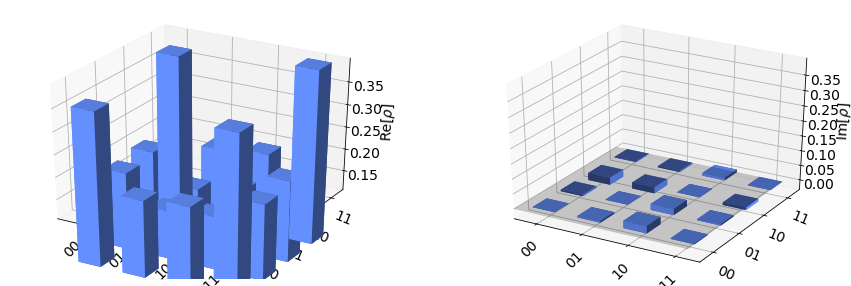

In [47]:
plot_state_city(rho_fit)

Now that we have seen how to use Qiskits tools for quantum state tomography, we can proceed and execute conditional quantum state tomography.

We start by performing the same steps as above, i.e. we first execute the ancillas `ancilla_tomography_circs` and retrieve the job results:

In [48]:
job = execute(ancilla_tomography_circs, backend_QASM, shots=512, parameter_binds=[{theta: 0.75}])
ancilla_results = job.result()

So far, the results object `ancilla_results` also contains results from unsuccessful execution (i.e. where the target qubits where measured with different outcomes) and it has a structure from which we cannot reconstruct the density matrix of the control qubits directly. So what we have to to is:

1. Discard the results from unsuccessful executions.
2. Remove those parts in the object `ancilla_results` that prevent us from using the fitter.

To better see what excatly needs to be done, let's compare the property `results` of the `job_results` and the `ancilla_results`:

In [49]:
job_results.results[0]

ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=448, 0x3=64)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=4, name="('X', 'X')", qreg_sizes=[['q0', 4]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=411770848, shots=512, status='DONE', success=True, time_taken=0.0030241350000000003)

In [50]:
ancilla_results.results[0]

ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=131, 0x3=53, 0x4=75, 0x8=67, 0xc=127, 0xf=59)), header=Obj(clbit_labels=[['c2', 0], ['c2', 1], ['c1', 0], ['c1', 1]], creg_sizes=[['c2', 2], ['c1', 2]], memory_slots=4, n_qubits=4, name="('X', 'X')", qreg_sizes=[['q0', 4]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 4, 'parallel_state_update': 1}, seed_simulator=3707432137, shots=512, status='DONE', success=True, time_taken=0.00309151)

The property `results` is a list that contains information about the results of each circuit that was executed. (Here the `ancilla_tomography_circs`.)

First, the property `counts` has to be adjusted in such a way that all events where the target qubits had different outcomes are removed and the counts for the outcomes of the control qubits have to be adjusted. With this we mean that if there were events such as `'00 11'` and `'11 11'` the counts of those events are added for the measurement of a control qubit outcome of `'11`.

We can get the counts as a dictionary using the method `get_counts`. So for the first circuit in `ancilla_tomography_circs` the counts dictionary can be created like this:

In [51]:
ancilla_results.get_counts(0)

{'11 11': 59,
 '00 00': 131,
 '00 11': 53,
 '01 00': 75,
 '10 00': 67,
 '11 00': 127}

The first two bits are the outcomes of the target qubits and so we have to remove all key-value pairs whose first two bits are either `'01'` or `'10'`:

In [52]:
conditional_counts = {}
for result, count in ancilla_results.get_counts(6).items():
    target_measurement = result.split(' ')[0]
    control_measurement = result.split(' ')[1]
    if target_measurement in ('00', '11'):
            if control_measurement in conditional_counts:
                conditional_counts[control_measurement] = conditional_counts[control_measurement] + count
            else:
                conditional_counts[control_measurement] = count
                
conditional_counts

{'10': 53, '11': 52, '00': 137, '01': 122}

Now the field counts from the object `job_results.results[0]` has the method `from_dict` that creates the required data struture a from dictionary in the form of `conditional_counts`:

In [53]:
ancilla_results.results[0].data.counts.from_dict(conditional_counts)

Obj(00=137, 01=122, 10=53, 11=52)

In addition we have to do the following steps:
* Remove the bits from the classical register $c1$ in `clbit_labels` and in `creg_sizes`. 
* Set the value of `memory_slots` to 2.

In [54]:
# This creates a copy of the results object
conditional_results = deepcopy(ancilla_results)

# Loop through results for each circuit
for ii,_ in enumerate(ancilla_results.results):
    # Get all counts
    counts = ancilla_results.get_counts(ii)
    
    # Create empty dictionary to store counts for control qubits
    conditional_counts = {}
    
    # Extract counts for each measurement result
    for result, count in counts.items():
        # Split result into parts for target qubits and control qubits
        target_measurement = result.split(' ')[0]
        control_measurement = result.split(' ')[1]
        
        # Keep counts of successful purifications
        if target_measurement in ('00', '11'):
            if control_measurement in conditional_counts:
                conditional_counts[control_measurement] = conditional_counts[control_measurement] + count
            else:
                conditional_counts[control_measurement] = count
    
    # Create new counts property from conditional_counts
    conditional_counts_struct = conditional_results.results[ii].data.counts.from_dict(conditional_counts)
    conditional_results.results[ii].data.counts = conditional_counts_struct
    
    # Remove classical bits in ancilla register
    old_labels = conditional_results.results[ii].header.clbit_labels
    conditional_results.results[ii].header.clbit_labels = old_labels[0:2]
    
    # Remove ancilla register
    old_sizes = conditional_results.results[ii].header.creg_sizes
    conditional_results.results[ii].header.creg_sizes = [old_sizes[0]]
    
    # Set memory_slots to 2
    conditional_results.results[ii].header.memory_slots = 2

If we inspect the new results `conditional_results` we see that they now have the same shape as the `job_results`:

In [55]:
conditional_results.results[0]

ExperimentResult(data=ExperimentResultData(counts=Obj(00=258, 11=112)), header=Obj(clbit_labels=[['c2', 0], ['c2', 1]], creg_sizes=[['c2', 2]], memory_slots=2, n_qubits=4, name="('X', 'X')", qreg_sizes=[['q0', 4]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 4, 'parallel_state_update': 1}, seed_simulator=3707432137, shots=512, status='DONE', success=True, time_taken=0.00309151)

(To the best knowledge of the author, the property `shots` does not need to be adjusted and the fitter takes care of a possibly smaller number of remaining events.)

The object `conditional_results` can now be used to reconstruct the density matrix of the control qubits in case of a successful purification, again using the `StateTomographyFitter` class:

In [56]:
# This reconstructs the density matrix from condictional results
conditional_rho_fit = StateTomographyFitter(conditional_results, tomography_circs).fit()

The fitted density matrix in case of a successful purification is now:

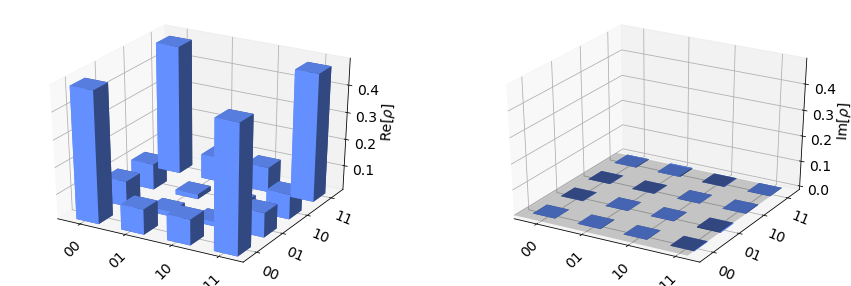

In [57]:
plot_state_city(conditional_rho_fit)

The state `conditional_rho_fit` depends on the bilateral rotation contained in the twirl circuit `twirl_circ`, because Alice and Bob choose randomly, which bilateral rotation is implemented in the beginning.

Remember that the reason for this was that the BBPSSW protocol works on Werner states $W_F$ and they are arithmetic averages of bilaterally-rotated density matrices,

$$
W_F = \frac{1}{12} \sum_{i=1}^{12} U_i^\dagger \rho_\textrm{S} U_i.
$$

In practice, Alice and Bob choose a random element from the set $\{U_i\}$ of bilateral operations and apply it to a source state $\rho_\textrm{S}$. If Alice and Bob perform this random operation on a number $N$ of states $\rho_\textrm{S}$, then for large $N$ the average state will be approximately a Werner state,

$$
W_F \approx \frac{1}{N} \sum_{n=1}^N \rho_n,
$$

where $\rho_n$ shall denote the state after the bilateral rotation.

The interesting figure of merit is thus not a single control-qubit state `conditional_rho_fit` after the BBPSSW protocol but rather an average of these states over many execution runs with randomly chosen operations $U_i$ in the twirl circuit `twirl_circ`. In the following section, we therefore study an a large number of source states $\rho_\textrm{S}$ and calculate the average outcome of the BBPSSW protocol to demonstrate its working principle.

## 3.2 Ensemble Average

### 3.2.1 Definition of Auxiliary Functions

To make the following section easier to read, we define some helpful functions to implement the tomography for the case of an ensemble. Essentially, these functions summarize the steps from the previous section in a compact way.

First we define a function `experiment_circuit`, which has the index of the bilateral rotation as input parameter and returns a corresponding experiment circuit for the whole purification procedure:

In [58]:
def experiment_circuit(index):
    """ Returns experiment circuit corresponding to an index.
    
    Keyword arguments:
    index -- integer between 0 and 11
    
    Returns:
    experiment_circ -- quantum circuit
    """
    if index < 0 or index > 11:
        raise Exception("Index for bilateral rotation exceeds range of possible values.")
        
    # Create the twirl circuit from the bilateral rotations
    twirl_circ = QuantumCircuit(qr)
    bilateral_rotation(twirl_circ, control_qubits, index)
    bilateral_rotation(twirl_circ, target_qubits, index)
    
    experiment_circ = source_circ + twirl_circ + purification_circ
    
    return experiment_circ

Next we define a function `ancilla_circuit` which takes a quantum circuit and returns a corresponding ancilla circuit which is a copy of the original circuit and in which certain qubits are measured:

In [59]:
def ancilla_circuit(quantum_circuit, qubits, bits):
    """ Return an ancilla circuit that includes additional measurements.
    
    Keyword arguments:
    quantum_circuit -- single quantum circuit
    qubits -- list of qubits to be measured
    bits -- list of bits to store measurement results
    """
    if len(qubits) != len(bits):
        raise Exception("Number of qubits must equal number of bits.")
        
    ancilla_circ = deepcopy(quantum_circuit)
    ancilla_circ.add_register(cr)
    
    for qubit, bit in zip(qubits, bits):
        ancilla_circ.measure(qubit, bit)
    
    return ancilla_circ

To perform conditional quantum state tomography, we have seen that the ancilla tomography circuits must be executed, and we need the tomography circuits for the original experiment circuit along with the execution results to fit the state of the control qubits. For this purpose we define a function `conditional_tomography_circuits`, which returns both sets of tomography circuits:

In [60]:
def conditional_tomography_circuits(quantum_circuit):
    """ Returns all tomography circuits for conditional quantum state tomography. 
    
    Keyword arguments:
    quantum_circuit -- single quantum circuit
    
    Returns:
    tomography_circs -- tomography circuits for quantum circuit
    ancilla_tomography_circs -- ancilla tomography circuits with measurements on control qubits
    """
    ancilla_circ = ancilla_circuit(quantum_circuit, target_qubits, [cr[0], cr[1]])
    tomography_circs = state_tomography_circuits(quantum_circuit, control_qubits)
    ancilla_tomography_circs = state_tomography_circuits(ancilla_circ, control_qubits)
    
    return tomography_circs, ancilla_tomography_circs

We have also seen how to edit the results of the execution of ancilla tomography circuits so that all shots that do not meet the condition for successful purification are discarded. We summarize those steps in the function `purification_shots`:

In [61]:
def purification_shots(job_results):
    """ Keep counts for successful purifications and return corresponding result.
    
    Keyword arguments:
    job_results -- execution results
    
    Returns:
    conditional_results -- results without unsuccessful shots
    """
    
    conditional_results = deepcopy(job_results)
    for ii,_ in enumerate(job_results.results):
        counts = job_results.get_counts(ii)
        conditional_counts = {}

        for result, count in counts.items():
            target_measurement = result.split(' ')[0]
            control_measurement = result.split(' ')[1]

            if target_measurement in ('00', '11'):
                if control_measurement in conditional_counts:
                    conditional_counts[control_measurement] = conditional_counts[control_measurement] + count
                else:
                    conditional_counts[control_measurement] = count

        conditional_results.results[ii].data.counts \
            = conditional_results.results[ii].data.counts.from_dict(conditional_counts)
        conditional_results.results[ii].header.clbit_labels = conditional_results.results[ii].header.clbit_labels[0:2]
        conditional_results.results[ii].header.creg_sizes = [conditional_results.results[ii].header.creg_sizes[0]]
        conditional_results.results[ii].header.memory_slots = 2
            
    return conditional_results

In order to reconstruct a density matrix from tomography results, we have seen that an instance of the class `StateTomographyFitter` must be initiated from the tomography circuits and the corresponding execution results. In the following steps of the tutorial it is therefore helpful to save the tomography circuits and the corresponding execution job in some way and we choose a Python dictionary for it. To easily create a dictionary of the desired structure, we define the function `job_dictionary`:

In [62]:
def job_dictionary(circuits, job):
    """ Return dictionary.
    
    Keyword arguments:
    circuits -- list of quantum circuits
    job -- execution job, should correspond to execution of circuits
    """
    job_dict = {}
    job_dict["circuits"] = circuits
    job_dict["job"] = job
    
    return job_dict

The reason why we do not save the execution results directly becomes apparent at a later point. In short, running a job on a real device can take time because other users' jobs can also be in the queue. By saving the job object itself, we can regularly check its state until its execution is complete.

When a job has been executed, a density matrix can be reconstructed from a dictionary returned by the above function using the function `rho_from_dict` defined below. An additional input argument `cond_tomo` also allows to specify whether conditional tomography should be performed (i.e. all unsuccessful purification shots are discarded from the tomography results) or not:

In [63]:
def rho_from_dict(job_dict, cond_tomo):
    """ Desc does here.
    
    Keyword arguments:
    experiment_dict -- dictionary
    cond_tomo -- boolean specifying to perform conditional tomography (cond_tomo=True)
    
    Returns:
    rho_fit -- reconstructed density matrix
    """
    if cond_tomo:
        conditional_results = purification_shots(job_dict["job"].result())
        rho_fit = StateTomographyFitter(conditional_results, job_dict["circuits"]).fit()
    else:
        rho_fit = StateTomographyFitter(job_dict["job"].result(), job_dict["circuits"]).fit()
    
    return rho_fit

We summarize some of the previous functions and the execution of the tomography circuits in the function `execute_purification`, which returns exactly the dictionary containing the execution job and the corresponding tomography circuits:

In [64]:
def execute_purification(F_in, index, backend, shots=1024, noise_model=None, coupling_map=None):
    """Returns density matrix of control qubits after BBPSSW protocol.
    
    Keyword arguments:
    F_in -- input fidelity
    index -- integer between 0 and 11, defines bilateral rotation
    backend -- backend to run circuits on
    shots -- number of shots per execution
    noise_model -- noise model for simulation of real device (required for noisy simulation)
    coupling_map -- coupling structure of physical qubits (required for noisy simulation)
    
    Returns:
    exp_dict -- dictionary containing job and tomography circuits
    """
    if noise_model == None:
        basis_gates = None
    else:
        basis_gates = noise_model.basis_gates
    
    # create circuits
    experiment_circ = experiment_circuit(index)
    tomography_circs, ancilla_tomography_circs = conditional_tomography_circuits(experiment_circ)
    
    # execute circuits on simulator or real device
    if backend.configuration().simulator == False:
        job = execute(ancilla_tomography_circs, backend, shots=shots, parameter_binds=[{theta: F_to_theta(F_in)}])
    else:
        job = execute(ancilla_tomography_circs, backend, shots=shots, noise_model=noise_model,
                      coupling_map=coupling_map, basis_gates=basis_gates, parameter_binds=[{theta: F_to_theta(F_in)}])
    
    exp_dict = job_dictionary(tomography_circs, job)
    
    return exp_dict

In the function `execute_purification` we already consider the case of a simulation with noise, which will be dealt with in the next part (**Part IV: Noise in the simulation model**). To perform such a simulation, we need additional objects (`noise_model`, `coupling_map` and `basis_gates`), which are already included in the above function. We will explain what these objects are when required in the tutorial.

In addition, we have already prepared the case that the circuits will run on a real IBM Q device. If the desired backend is a real device, i.e. the property `backend.configuration().simulator` is `False`, we do not pass the parameters for a noisy simulation (`noise_model`, `coupling_map` and `basis_gates`) to the Qiskit function `execute`.

With the auxiliary functions defined above, we essentially perform the following two steps to purify entanglement (whether as a unitary or noisy simulation, or on a real device):
1. Create and execute quantum circuits using `execute_purification`.
2. Reconstruct a density matrix using `rho_from_dict`.

### 3.2.2 Simulation

In Section **3.1 Single Quantum System** we have executed the BBPSSW protocol for a single system consisting of two qubit pairs in the state $\rho_\textrm{S}$. In this case, the result of the protocol, i.e. the state of the control qubits, depends on the randomly selected bilateral rotation.

However, we are interested in the state $\rho'_{F'}$, which is the average state of the control qubits after applying the BBPSSW protocol. To get this state $\rho'_{F'}$ in our simulation, we calculate the average

$$
\rho'_{F'} \approx \frac{1}{N} \sum_{n=1}^{N} \rho_n',
$$

where $\rho_n'$ denotes the control-qubit state after the application of the BBPSSW protocol to a single system in execution run $n$ and $N$ is the total number of execution runs. (This is equivalent to applying the protocol to $N$ quantum systems and averaging across all systems.) Here, each execution run varies in the random selection of the bilateral rotation. The number of $N$ runs must therefore be large enough to make the result independent of the selected rotations. (We would get the exact state $\rho'_{F'}$ in the limit $N \rightarrow \infty$.)

With the functions defined above, the implementation in Qiskit for $N=100$ runs and an initial fidlity of $F = 0.75$ looks like this to approximately get the average state $\rho'_{F'}$:

In [65]:
# number of runs and initial fidelity
runs = 100
F = 0.75

# empty list to store the reconstructed density matrix of each run
fitted_states = []

# perform runs
for ii in range(runs):
    random_idx = np.random.randint(12)
    experiment_circ = experiment_circuit(random_idx)
    tomography_circs, ancilla_tomography_circs = conditional_tomography_circuits(experiment_circ)
    
    # execute ancilla tomography circuits
    job = execute(ancilla_tomography_circs, backend_QASM, shots=1024, parameter_binds=[{theta: F_to_theta(F)}])
    job_results = job.result()
    
    # keep successful shots
    conditional_results = purification_shots(job_results)

    # reconstruct density matrix
    rho_fit = StateTomographyFitter(conditional_results, tomography_circs).fit()
    
    # add density matrix to list
    fitted_states.append(rho_fit)
    
# calculate the ensemble average
rho_average = sum(fitted_states)/runs

Also here we can depict the average state `rho_average`, e.g. by representing its real and imaginary parts:

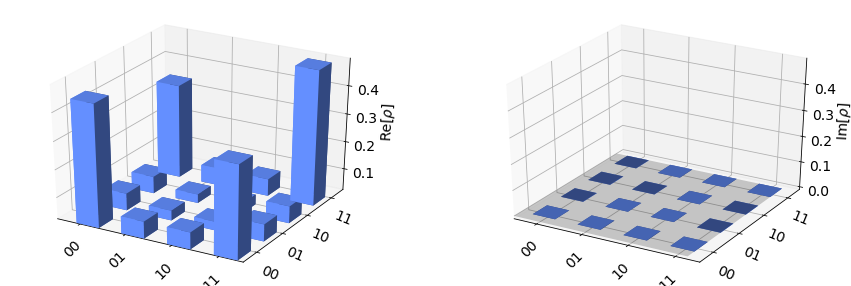

In [66]:
plot_state_city(rho_average)

Insert comparison to initial state!

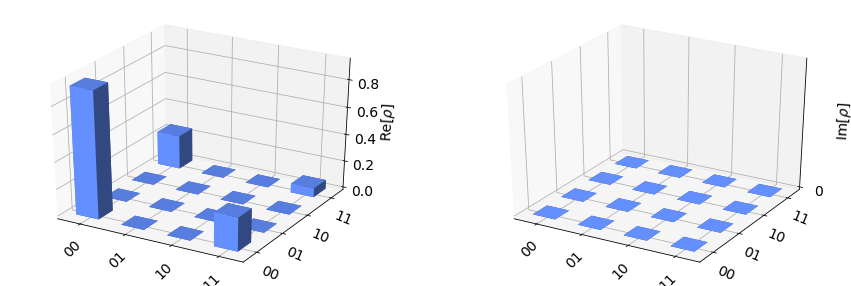

In [67]:
rho_S = np.cos(F_to_theta(F)/2)*np.array([1, 0, 0, 0]) + np.sin(F_to_theta(F)/2)*np.array([0, 0, 0, 1])
plot_state_city(rho_S)

Now we want to see how well our simulation worked and calculate the fidelity $F'$,

$$
F' = \langle \Phi^+ | \rho'_{F'} | \Phi^+ \rangle.
$$

We can use the Qiskit function `state_fidelity` which returns the fidelity between two quantum states given as input arguments:

In [68]:
simulated_output_fidelity = state_fidelity(rho_average, phi_plus)

We compare the fidelity `simulated_output_fidelity` coming from our simulation with the theoretical output value of the BBPSSW protocol:

In [69]:
print('Input fidelity =', F)
print('Theoretical output fidelity = {:.4f}'.format(output_fidelity(F)))
print('Simulated output fidelity = {:.4f}'.format(simulated_output_fidelity))

Input fidelity = 0.75
Theoretical output fidelity = 0.7885
Simulated output fidelity = 0.8015


The output fidelity of the simulation is close to the theoretically expected one, which can also be seen from plotting the result:

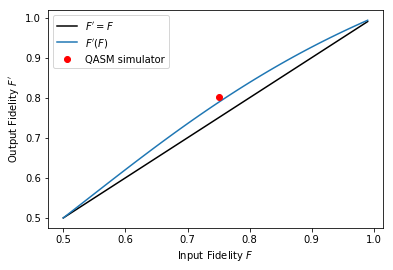

In [70]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(F, simulated_output_fidelity, 'ro', label='QASM simulator')
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

> **Exercise 3**  
The state $\rho'_{F'}$ of the control qubits can be calculated to be 
>
>$$
\rho'_{F'} =
$$
>
>Write a function `output_state` in analogy to the function `Werner_state`, which takes the fidelity $F$ as an input argument and returns the theoretical state $\rho'_{F'}$ as a numpy array.

In [71]:
def output_state(F):
    """Returns output state rho'_F' after BBPSSW protocol.
    
    Keyword arguments:
    F -- fidelity of input state, range [0, 1]
    """
    if F < 0 or F > 1:
        raise Exception('Fidelity must be between 0 and 1.')
    
    state = F*np.outer(psi_minus, psi_minus.conj().T) \
    + (1 - F)/3*(np.outer(phi_plus, phi_plus.conj().T) \
                         + np.outer(phi_minus, phi_minus.conj().T) \
                         + np.outer(psi_plus, psi_plus.conj().T))
    
    return state

> **Exercise 4**
Create the exact state $\rho'_{F'}$ using your function `output_state` and calculate the state fidelity between $\rho'_{F'}$ and the simulated output state `rho_average`. If the implementation is correct, the fidelity should be around 99 %.

After seeing that our Qiskit implementation of the BBPSSW protocol works, we will perform entanglement purification for different input fidelities $F$ in the range between 0.5 and 1.

We define these fidelities in a numpy array `input_fidelities`:

In [72]:
input_fidelities = np.arange(0.5, 1, 0.05)

We simulate the BBPSSW protocol for all fidelities using the previously defined function `execute_purification`, which further shortens the implementation, and store all output fidelities in a list called `output_fidelities`:

In [73]:
runs = 100

# empty list to store output fidelities
output_fidelities = []

for jj, fidelity in enumerate(input_fidelities):
    fitted_states = []
    for ii in range(runs):
        random_idx = np.random.randint(12)
        
        # execute circuits and reconstruct density matrix
        exp_dict = execute_purification(fidelity, random_idx, backend_QASM)
        rho_fit = rho_from_dict(exp_dict, cond_tomo=True)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    # calculate fidelity and add to list
    output_fidelities.append(state_fidelity(rho_average, phi_plus))
    
    print(str(jj+1) + "/" + str(len(input_fidelities)) + " experiments done.")

1/10 experiments done.
2/10 experiments done.
3/10 experiments done.
4/10 experiments done.
5/10 experiments done.
6/10 experiments done.
7/10 experiments done.
8/10 experiments done.
9/10 experiments done.
10/10 experiments done.


If we now compare the purified fidelities with the input fidelities, we can see a good agreement between the simulated results and the theoretical expectation:

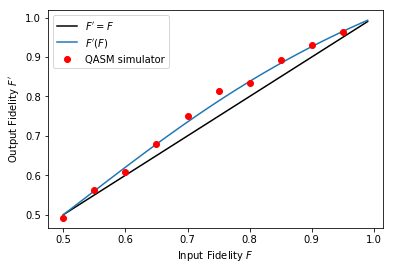

In [74]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(input_fidelities, output_fidelities, 'ro', label='QASM simulator')
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

From the simulation, in which we have not included any error sources, we see that the implementation of the BBPSSW protocol for entanglement purification works.

The ultimate goal is to run the BBPSSW protocol on a real IBM Q device. But before we do this, we will include noise in our simulation model to consider imperfections in the quantum computation and see how much the effects of noise affect output fidelity.

# Part IV: Including Noise in the Simulation Model
***

In this part we will simulate the quantum circuit for the BBPSSW protocol using a model that includes noise. Noise in this context means errors that occur on real devices such as single-qubit gate errors, two-qubit gate errors and single-qubit readout errors. A simple noise model can e.g. be created using error parameters directly provided through the calibration data of the real devices. This is going to be the way we construct the noise model here.

In the following, we show how to choose a real IBM Q device as backend and read out the necessary data using an IBM Q account. Afterwards we explain how to generate a noise model using integrated Qiskit functions and run a noisy simulation using the QASM simulator.

## 4.1 IBM Q Account

To use the IBM Q Experience, we first have to import the necessary libraries:

In [75]:
from qiskit import IBMQ

If you have saved your IBM Q credentials locally beforehand, you can load your IBM Q account with the function `load_account`:

In [76]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

More information about to handle your IBM Q account, we refer to the corresponding Qiskit Notebook [4].

The real backends are provided by so-called providers. In the authors case, we have only access to a single provider, namely to the one that gives access to the public IBM Q devices:

In [77]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

We can access this provider using the method `get_provider` and specifying it as input argument:

In [78]:
my_provider = IBMQ.get_provider(hub='ibm-q')

The provider instance `my_provider` lets you access a list of accessible devices using the method `backends`:

In [79]:
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

A real IBM Q device can now be selected as backend with the method `get_backend` and for this tutorial we use the device `ibmqx2`:

In [80]:
backend_IBMQ = my_provider.get_backend('ibmqx2')

## 4.2 Creation of Noise Model in Qiskit

It was already mentioned that Qiskit provides integrated functions to construct simple noise models from device parameters such as

* single-qubit gate errors,
* two-qubit gate errors, and
* single-qubit readout errors.

A noise model can be created by providing values for the above mentioned parameters or directly from the calibration data of real IBM Q devices. To use this feature, we first need to import the module `noise` from the Qiskit element Aer:

In [81]:
from qiskit.providers.aer import noise

The above listed noise parameters of a real device are stored in the backend properties, to which one has access using the method `properties`:

In [82]:
properties = backend_IBMQ.properties()

We do not need to extract specific information from the object `properties` to create a corresponding noise model. Instead, we use the function `basic_device_noise_model`, which is part of the `noise` module, to create a noise model directly from the backend properties:

In [83]:
noise_model = noise.device.basic_device_noise_model(properties)

The object `noise_model` is an instance of the `NoiseModel` class and can be used in the QASM simulator to perform noisy simulations.

Since not all qubits on a real device are directly coupled to each other, it will probably happen that additional gates need to be introduced when running a circuit on a real device. These gates will swap quantum states between qubits such that multi-qubit gates can be performed. To incorporate such processes in the simulation, the function `execute` takes an additional input parameter `coupling_map`, in which the qubit couplings can be provided.

We can also read the coupling directly from the device itself using the property `coupling_map` of a backend configuration:

In [84]:
coupling_map = backend_IBMQ.configuration().coupling_map

With the `noise_model` together with `coupling_map` we have all the information ready that is required to perform a (simple) noisy simulation of the quantum circuit for the BBPSSW protocol. 

## 4.3 Simulation Including Noise

To perform a noisy simulation with the QASM simulator, we can again use the function `execute` and provide two additional input parameters, which are
* `noise_model`: An instance of the `NoiseModel` class.
* `coupling_map`: A list of specified qubit couplings.

Our function `execute_purification` has been already defined in such a way that we simply give the additional parameters `noise_model` and `coupling_map` as input arguments, which are then basically fed into the function `execute` to perform the noisy simulation to eventually obtain the reconstructed density matrix of the control qubits.

**However, to determine the output fidelity as a function of the input fidelity in the noisy scenario, we need to perform an additional simulation.**

Remember that the BBPSSW protocol works on Werner states $W_F$. So the input fidelity $F$ to the BBPSSW protocol is the fidelity of the Werner state $W_F$ that we created after the application the twirl circuit `twirl_circ`. In case of a noisy simulation this fidelity is most likely to be less than the fidelity $F_\textrm{S}$ of the source state $\rho_\textrm{S}$,

$$
F_\textrm{S} = \langle \Psi^- | \rho_\textrm{S} | \Psi^- \rangle,
$$

due to errors in the preparation process of $W_F$. I.e. in general we have have 

$$
F_\textrm{S} \leq F,
$$

with equality only in the case of a unitary time evolution without any sources of noise. 

The actual input fidelity $F$ is the fidelity of the two-qubit state after the initialization circuit `source_circ` and application the twirl operation in `twirl_circ`.

To eventually compare the input fidelity $F$ to the output fidelity $F'$, we thus have to first perform a simulation of only the circuits `source_circ` and `twirl_circ` to find the actual input state to the BBPSSW protocol. We also need to check if it is indeed a state of Werner form $W_F$ and from it then calculate the actual input fidelity $F$.

### 4.3.1 Initial State and Initial Fidelity

As we described above, the input fidelity $F$ to the BBPSSW protocol is the fidelity of the state $W_F$ towards the state $|\Psi^-\rangle$, which is obtained after the initialization circuit and the twirl operation.

(We still need to show that it actually is a Werner state, which we can do after the noisy simulation.)

In the following we will perform a noisy simulation of a quantum circuit that consists of the circuits `source_circ` and `twirl_circ`, and to reconstruct the state $W_F$, we perform quantum state tomography of the control qubits.

Again, we define some helpful functions that make the implementation more easy to read and understand.

First, we define a function `initialization_circuit` that takes the index of the bilateral rotation as an input argument and returns a corresponding experiment circuit for the initialization procedure including the twirl:

In [85]:
def initialization_circuit(index):
    """ Provide an index for bilateral rotation and return corresponding experiment circuit. """
    if index < 0 or index > 11:
        raise Exception("Index for bilateral rotation exceeds range of possible values.")
        
    twirl_circ = QuantumCircuit(qr)
    bilateral_rotation(twirl_circ, control_qubits, index)
    bilateral_rotation(twirl_circ, target_qubits, index)
    
    experiment_circ = source_circ + twirl_circ
    
    return experiment_circ

We summarize all the steps for the execution of the initialization procedure in the function `execute_initialization`. This function creates the initialization circuit via the function `initialization_circuit` from above, generates the corresponding tomography circuits using the Qiskit function `state_tomography_circuits`, and executes the tomography circuits on the backend that is given as input parameter:

In [86]:
def execute_initialization(F_in, index, backend, shots=1024, noise_model=None, coupling_map=None):
    """Desc goes here.
    
    Keyword arguments:
    F_in -- input fidelity
    index -- integer between 0 and 11, defines bilateral rotation
    backend -- backend to run circuits on
    shots -- number of shots per execution
    noise_model -- noise model for simulation of real device
    coupling_map -- coupling structure of physical qubits
    
    Returns:
    exp_dict -- dictionary containing execution job and corrresponding quantum circuits
    """
    if noise_model == None:
        basis_gates = None
    else:
        basis_gates = noise_model.basis_gates
    
    # create circuits
    experiment_circ = initialization_circuit(index)
    tomography_circs = state_tomography_circuits(experiment_circ, control_qubits)

    # execute circuits
    if backend.configuration().simulator == False:
        job = execute(tomography_circs, backend, shots=shots, parameter_binds=[{theta: F_to_theta(F_in)}])
    else:
        job = execute(tomography_circs, backend, shots=shots, noise_model=noise_model, coupling_map=coupling_map,
                      basis_gates=basis_gates, parameter_binds=[{theta: F_to_theta(F_in)}])

    exp_dict = job_dictionary(tomography_circs, job)
    
    return exp_dict

We define a list of source fidelities $F_\textrm{S}$, for which we want to extract the resulting input fidelities $F$:

In [87]:
source_fidelities = np.arange(0.5, 1, 0.05)

In analogy to our simulation of the whole protocol in the absence of noise in **Part III** of the tutorial, we average over $N=100$ execution runs and store the reconstructed initial states and the corresponding input fidelities in the lists `simulated_initial_states` and `input_fidelities_noise`:

In [88]:
runs = 100

simulated_initial_states = []
input_fidelities_noise = []

for jj, fidelity in enumerate(source_fidelities):
    fitted_states = []
    
    for ii in range(runs):
        random_idx = np.random.randint(12)
        exp_dict = execute_initialization(fidelity, random_idx, backend_QASM, shots=512, noise_model=noise_model,
                                           coupling_map=coupling_map)
        rho_fit = rho_from_dict(exp_dict, cond_tomo=False)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    input_fidelities_noise.append(state_fidelity(rho_average, psi_minus))
    simulated_initial_states.append(rho_average)
    
    print(str(jj+1) + "/" + str(len(source_fidelities)) + " experiments done.")

1/10 experiments done.
2/10 experiments done.
3/10 experiments done.
4/10 experiments done.
5/10 experiments done.
6/10 experiments done.
7/10 experiments done.
8/10 experiments done.
9/10 experiments done.
10/10 experiments done.


We can now plot the resulting input fidelities from the list `input_fidelities_noise` against the source fidelties `source_fidelities` to see the degree of degradation due to noise:

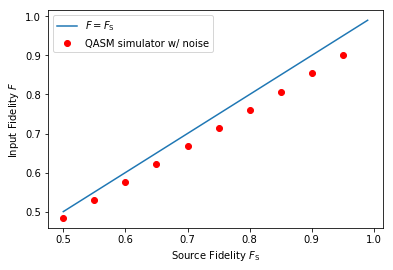

In [89]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, label = "$F = F_\mathrm{S}$")
plt.plot(source_fidelities, input_fidelities_noise, 'ro', label='QASM simulator w/ noise')
plt.legend()
plt.xlabel('Source Fidelity $F_\mathrm{S}$')
plt.ylabel("Input Fidelity $F$");

For all source fidelities $F_\mathrm{S}$ we observe from the simulation results that the corresponding input fidelity $F$ is smaller than $F_\mathrm{S}$.

Besides the magnitude of the initial fidelity, another crucial requirement for the functionality of the BBPSSW protocol is that the input states have Werner form $W_F$. To see how well this is achieved in the noisy simulation, we calculate the fidelities between the generated input states `simulated_initial_states` and the corresponding Werner states $W_F$ and store them in the list `fidelities_Werner`:

In [90]:
# empty list to store fidelities
fidelities_Werner = []

for jj, state in enumerate(simulated_initial_states):
    # calculate state fidelity
    fidelity = state_fidelity(state, Werner_state(input_fidelities_noise[jj]))
    
    # add fidelity to list
    fidelities_Werner.append(fidelity)

One can plot the fidelities `fidelities_Werner` against the source fidelities $F_\mathrm{S}$ and see that Werner states can be initialized with fidelities of 99 % and more:

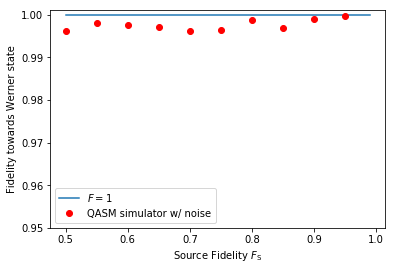

In [91]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, np.ones(len(F_in)), label = "$F = 1$")
plt.plot(source_fidelities, fidelities_Werner, 'ro', label='QASM simulator w/ noise')
plt.legend()
plt.xlabel('Source Fidelity $F_\mathrm{S}$')
plt.ylabel('Fidelity towards Werner state')
plt.ylim(0.95, 1.001);

To summarize, we showed in this noisy simulation that after the initialization procedure through the quantum circuits `source_circ` and `twirl_circ` a Werner state $W_F$ can be generated but with a fidelity $F$ that is smaller than the fidelity $F_\mathrm{S}$ of the original source state.

### 4.3.2 Entanglement Purification in the Presence of Noise

In Sec. 3.2.1 we defined the function `execute_purification`. To perform a noisy simulation of the BBPSSW protocol on the QASM simulator, we can simply pass the additional parameters `noise_model` and `coupling_map` to this function, which will then eventually be passed to the Qiskit function `execute`. 

Again we average over $N=100$ runs for all source fidelities defined in `source_fidelities` and store the output fidelities in the list `output_fidelities_noise`:

In [92]:
runs = 100
output_fidelities_noise = []

for jj, fidelity in enumerate(source_fidelities):
    fitted_states = []
    for ii in range(runs):
        random_idx = np.random.randint(12)
        
        # execute circuits and reconstruct density matrix
        exp_dict = execute_purification(fidelity, random_idx, backend_QASM, shots=512, noise_model=noise_model, 
                                        coupling_map=coupling_map)
        rho_fit = rho_from_dict(exp_dict, cond_tomo=True)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    # calculate fidelity and add to list
    output_fidelities_noise.append(state_fidelity(rho_average, phi_plus))
    
    print(str(jj+1) + "/" + str(len(input_fidelities)) + " experiments done.")

1/10 experiments done.
2/10 experiments done.
3/10 experiments done.
4/10 experiments done.
5/10 experiments done.
6/10 experiments done.
7/10 experiments done.
8/10 experiments done.
9/10 experiments done.
10/10 experiments done.


Now, let's see how good the purification worked if we include realistic noise parameters in the simulation. Therefore we plot the output fidelities `output_fidelities_noise` as a function of the input fidelities `input_fidelities_noise`:

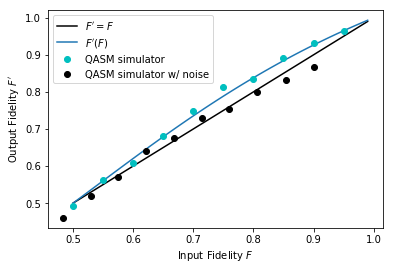

In [93]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(input_fidelities, output_fidelities, 'co', label='QASM simulator')
plt.plot(input_fidelities_noise, output_fidelities_noise, 'ko', label='QASM simulator w/ noise')
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

Due to the presence of noise, the output fidelity (black) is smaller compared to the case of unitary time evolution, which we studied in Sec. 3.2.2. 

We can see that the output fidelity is not as high as in the case of unitary time evolution, which is due to noise. Nevertheless, for fidelities around 0.7 to 0.8, where the increase in fidelity is the largest, one can observe to still gain some fidelity and therefore, one could expect to purifiy entanglement as well on a real device.

This will be tried in the next section.

# Part V: Entanglement Purification on a Real IBM Q Device
***

## 5.1 IBM Q Experience

We defined the functions `execute_initialization` and `execute_purification` in such a way that to execute the tomography circuits on a real IBM Q device, we simply pass it as the target backend. We also defined the real device  `ibmqx2` already as the backend `backend_IBMQ`.

When working with real IBM Q devices through the IBM Q Experience, one has to take into account two points when running the experiment for entanglement purification as we did in the previous sections:

### 5.1.1 Job Status and Device Queue
We already mentioned that a real device usually has a queue of jobs from other users. So besides the real execution duration of a quantum circuit, one has to wait the queue until the job is actually executed. Only when the job has been done, i.e. it has been sent to the device, it passed the queue and it ran successfully, we can extract the results using the method `results` and perform all successive steps that are required to reconstruct the density matrix. For this reason we stored the execution job itself in a dictionary so that we can later on retrieve the execution results from it when executed.

In [96]:
# import libraries for usage of real device
from qiskit.tools.monitor import job_monitor

### 5.1.2 Personal Credits
The number of execution jobs in a real device is limited by the number of persoanl credits. Each execution costs some amount of credits depending e.g. on the number of shots and the circuit size. So depending on your personal credits, you can only execute a maximum number of jobs. After a job was executed, the required credits will be replenished. 

As an example, in the author's case, we have 15 credits availiable and an execution of all 8 tomography circuits combined in one single job executed through the functions `execute_initialization` or  `execute_purification` costs 3 credits when using 1024 shots. Therefore, we cannot perform entanglement purification in such a way as we did in the simulation. 

Remember that we performed a number of execution runs $N$ to implement the averaging twirl operation and create a Werner state $W_F$,

$$
W_F \approx \frac{1}{N} \sum_{n=1}^N \rho_n,
$$

where $\rho_n$ shall denote the state after the bilateral rotation, or rather to eventually get the state $\rho'_{F'}$,

$$
\rho'_{F'} \approx \frac{1}{N} \sum_{n=1}^{N} \rho_n',
$$

where $\rho_n'$ denotes the control-qubit state after the application of the BBPSSW protocol in execution run $n$. We chose $N=100$ and would therefore need about 20 seperate execution batches of 5 jobs to execute all necessary circuits to obtain the state $\rho'_{F'}$.

To reduce the number of neccessary runs, we will adapt the procedure to obtain a Werner state $W_F$ (and eventually $\rho'_{F'}$). Instead of chosing randomly from the set of bilateral rotations, which would be the only way to go in a quantum communication network, we will apply each element of the set once to theoretically obtain an exact Werner state,

$$
W_F = \frac{1}{12} \sum_{i=1}^{12} U_i^\dagger \rho_\textrm{S} U_i,
$$

where $U_i$ is the unitary operation corresponding to the bilateral rotation (i.e. an element of the set) and $\rho_\textrm{S}$ is the source state before the twirl. In doing so, we only need to perform 12 experiments to generate a Werner state as input to the purification protocol.

The 12 experiments are split into three batches of four experiments, and one batch at a time will be sent to the device so that there will be enough credits available to perform these experiments. Eventually, when all twelve experiments have been successfully performed, we can reconstruct the density matrix through the conditional state tomography functions we defined above.

For a single experiment, we will store the tomography circuits and the execution job itself in a dictionary `experiment_dict` to later perform state tomography when all experiments have been performed.

In the following, we will perform the purification experiment for a source fidelity of $F_\textrm{S}=0.9$:

In [95]:
F_source = 0.9

Such a source fidelity will lead to an input fidelity roughly between 0.70 and 0.85, depending on the IBM Q device. For the `ibmqx2`, we will see that the input fidelity will be about 0.71

## 5.2 Initial State and Initial Fidelity

We first initialize an array `initialization_array` to store all the experiment dictionaries:

In [124]:
initialization_experiments = []

In [125]:
for ii in range(0, 4):
    exp_dict = execute_initialization(fidelity, ii, backend_IBMQ, shots=512)
    initialization_experiments.append(exp_dict)

In [126]:
job_monitor(initialization_experiments[-1]["job"])

Job Status: job has successfully run


In [128]:
for ii in range(4, 8):
    exp_dict = execute_initialization(fidelity, ii, backend_IBMQ, shots=512)
    initialization_experiments.append(exp_dict)

In [129]:
job_monitor(initialization_experiments[-1]["job"])

Job Status: job has successfully run


In [130]:
for ii in range(8, 12):
    exp_dict = execute_initialization(fidelity, ii, backend_IBMQ, shots=512)
    initialization_experiments.append(exp_dict)

In [131]:
job_monitor(initialization_experiments[-1]["job"])

Job Status: job has successfully run


So let's start with the first batch:

When all experiments of the first batch were successfull, we can run the second batch:

And, when this batch was also successfull, we run the last batch:

In [115]:
initialization_experiments[11]["job"].status()

<JobStatus.DONE: 'job has successfully run'>

In [132]:
for entry in initialization_experiments:
    print(entry["job"].status())

JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE
JobStatus.DONE


From the results of all the jobs, we can finally extract the initial fidelity, e.g. in the following way:

In [133]:
reconstructed_initial_states = []

for entry in initialization_experiments:
    #rho_fit = StateTomographyFitter(entry["job"].result(), entry["circuits"]).fit()
    rho_fit = rho_from_dict(entry, cond_tomo=False)
    reconstructed_initial_states.append(rho_fit)
    
rho_average = sum(reconstructed_initial_states)/len(reconstructed_initial_states)

experimental_input_fidelity = state_fidelity(rho_average, psi_minus)

print('Base fidelity =', F_source)
print('Experimental input fidelity =', experimental_input_fidelity)
print('Fidelity towards Werner state = ', state_fidelity(rho_average, Werner_state(experimental_input_fidelity)))

Base fidelity = 0.85
Experimental input fidelity = 0.7118958085978646
Fidelity towards Werner state =  0.9450892022714359


We can compare this value to the simulation results from the previous section:

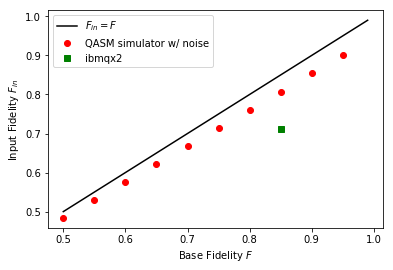

In [134]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F_{in} = F$")
plt.plot(source_fidelities, input_fidelities_noise, 'ro', label='QASM simulator w/ noise')
plt.plot(F_source, experimental_input_fidelity, 'gs', label=backend_IBMQ.name())
plt.legend()
plt.xlabel('Base Fidelity $F$')
plt.ylabel("Input Fidelity $F_{in}$");

From the plot above, we can see that results from the simulation nicely fit the experimental result for the chosen base fidelity. Furthermore, the initial state is close to being a Werner state $W_F$, which is the prerequisite to actually perform entanglement purification.

So as a final step of this turorial, we will execute the purification experiment on a real device and let's see how well it performs.

## 5.3 Execution of Entanglement Purification on a Real Device

As in the previous section, we define an array to store all experiment dictionaries called `purification_experiments`:

In [ ]:
# Initialization of array of experiment dictionaries
purification_experiments = []

In [ ]:
for ii in range(0, 4):
    exp_dict = execute_purification(fidelity, ii, backend_IBMQ, shots=512)
    purification_experiments.append(exp_dict)

In [ ]:
job_monitor(purification_experiments[-1]["job"])

In [ ]:
for ii in range(4, 8):
    exp_dict = execute_purification(fidelity, ii, backend_IBMQ, shots=512)
    purification_experiments.append(exp_dict)

In [ ]:
job_monitor(purification_experiments[-1]["job"])

In [ ]:
for ii in range(8, 12):
    exp_dict = execute_purification(fidelity, ii, backend_IBMQ, shots=512)
    purification_experiments.append(exp_dict)

In [ ]:
job_monitor(initialization_experiments[-1]["job"])

Then, we start by executing the first batch using the function `execute_batch` and chosing the the full purification experiment by giving the parameter `experiment_type='puri'` as input argument:

Again, in case that all experiments were successfull, we continue with the second batch:

And finally, the last batch:

In [ ]:
for entry in purification_experiments:
    print(entry["job"].status())

We reconstruct the density matrix after the application of the purification protocol and calculate the resulting fidelity:

In [131]:
reconstructed_density_matrices = []

for entry in purification_experiments:
    #result_for_tomography = purification_shots(entry["job"].result())
    #rho_fit = StateTomographyFitter(result_for_tomography, entry["circuits"] ).fit()
    rho_fit = rho_from_dict(entry, cond_tomo=True)
    reconstructed_density_matrices.append(rho_fit)
    
rhoAverage = sum(reconstructed_density_matrices)/len(reconstructed_density_matrices)

experimental_output_fidelity = state_fidelity(rhoAverage, phi_plus)

print('Base fidelity =', F_source)
print('Experimental input fidelity =', experimental_input_fidelity)
print('Theoretical output fidelity =', output_fidelity(experimental_input_fidelity))
print('Experimental output fidelity =', experimental_output_fidelity)

Base fidelity = 0.85
Experimental input fidelity = 0.7815428209592312
Theoretical output fidelity = 0.8202305212704412
Experimental output fidelity = 0.7312046576608289


We already see that the output fidelity is smaller than the input fidelity, but for comparison we will plot this together with the simulation results:

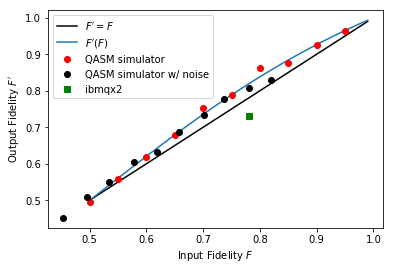

In [132]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(input_fidelities, output_fidelities, 'ro', label='QASM simulator')
plt.plot(input_fidelities_noise, output_fidelities_noise, 'ko', label='QASM simulator w/ noise')
plt.plot(experimental_input_fidelity, experimental_output_fidelity, 'gs', label=backend_IBMQ.name())
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

# Part V: Conclusion and Outlook

In [ ]:
def initial_state(input_fidelity, index, control_qubits, target_qubits, bits, backend, shots=1024,
                  noise_model=None, coupling_map=None):
    """Description."""
    
    if noise_model == None:
        basis_gates = None
    else:
        basis_gates = noise_model.basis_gates
    
    experiment_circuit = initialization_circuit(index)
    tomography_circuits, ancilla_tomography_circuits = conditional_tomography_circuits(experiment_circuit)
    
    if backend.configuration().simulator == False:
        job = execute(ancilla_tomography_circuits, 
                      backend, 
                      shots=shots,
                      parameter_binds=[{theta: np.arcsin(2*input_fidelity - 1)}]
                     )
    else:
        job = execute(ancilla_tomography_circuits, 
                      backend, 
                      shots=shots,
                      noise_model=noise_model,
                      coupling_map=coupling_map,
                      basis_gates=basis_gates,
                      parameter_binds=[{theta: np.arcsin(2*input_fidelity - 1)}]
                     )
    
    measurement_results = job.result()
    results_for_tomography = purification_shots(measurement_results)
    rho_fit = StateTomographyFitter(results_for_tomography, tomography_circuits).fit()
    
    return rho_fit

In [ ]:
def initial_state(F_in, index, backend, shots=1024, noise_model=None, coupling_map=None):
    """Returns density matrix of control qubits after initialization.
    
    Keyword arguments:
    F_in -- input fidelity
    index -- integer between 0 and 11, defines bilateral rotation
    backend -- backend to run circuits on
    shots -- number of shots per execution
    noise_model -- noise model for simulation of real device (required later)
    coupling_map -- coupling structure of physical qubits (required later)
    
    Returns:
    rho_fit -- two-qubit density matrix
    """
    if noise_model == None:
        basis_gates = None
    else:
        basis_gates = noise_model.basis_gates
    
    experiment_circ = initialization_circuit(index)
    tomography_circs = state_tomography_circuits(experiment_circ, control_qubits)

    if backend.configuration().simulator == False:
        job = execute(tomography_circs, backend, shots=shots, parameter_binds=[{theta: F_to_theta(F_in)}])
    else:
        job = execute(tomography_circs, backend, shots=shots, noise_model=noise_model, coupling_map=coupling_map,
                      basis_gates=basis_gates, parameter_binds=[{theta: F_to_theta(F_in)}])

    rho_fit = StateTomographyFitter(job.result(), tomography_circs).fit()
    
    return rho_fit

In [ ]:
runs = 100

simulated_initial_states = []
input_fidelities_noise = []

for jj, fidelity in enumerate(source_fidelities):
    fitted_states = []
    
    for ii in range(runs):
        random_idx = np.random.randint(12)
        rho_fit = initial_state(fidelity, random_idx, backend_QASM, shots=512, noise_model=noise_model, 
                                coupling_map=coupling_map)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    input_fidelities_noise.append(state_fidelity(rho_average, psi_minus))
    simulated_initial_states.append(rho_average)
    
    print(str(jj+1) + "/" + str(len(source_fidelities)) + " experiments done.")

In [ ]:
execute_batch('init', initialization_experiments, base_fidelity=F_source, idx_low=0, idx_high=4, 
              control_qubits=[qr[0], qr[1]], backend=backend_IBMQ)

In [96]:
def execute_batch(experiment_type, experiment_collection, base_fidelity, idx_low, idx_high,
                  control_qubits, backend, target_qubits=None, bits=None, shots=1024):
    """Description goes here."""
    
    for ii in range(idx_low, idx_high):
        if experiment_type == 'init':
            experiment = initialization_circuit(ii)
            tomography_circuits = state_tomography_circuits(experiment, control_qubits)
            ### remove
            tomography_circuits = transpile([circ.bind_parameters({theta: np.arcsin(2*base_fidelity - 1)}) for circ in tomography_circuits],
                                            backend_IBMQ, optimization_level=3)
            ###
            job = execute(tomography_circuits, 
                          backend, 
                          shots=shots)#,
                          #parameter_binds=[{theta: np.arcsin(2*base_fidelity - 1)}])
        elif experiment_type == 'puri':
            experiment = experiment_circuit(ii)
            tomography_circuits, ancilla_tomography_circuits = conditional_tomography_circuits(experiment)
            ### remove
            ancilla_tomography_circuits = transpile([circ.bind_parameters({theta: np.arcsin(2*base_fidelity - 1)}) for circ in ancilla_tomography_circuits],
                                            backend_IBMQ, optimization_level=1)
            ###
            job = execute(ancilla_tomography_circuits,
                          backend,
                          shots=shots)#,
                          #parameter_binds=[{theta: np.arcsin(2*base_fidelity - 1)}])
        else:
            raise Exception("Experiment type undefined, needs to be 'init' or 'puri'")
            
        print(job.status())
        experiment_dict = job_dictionary(tomography_circuits, job)
        experiment_collection.append(experiment_dict)
    
    last_job = experiment_collection[-1]["job"]
    job_monitor(last_job)

In [ ]:
runs = 100

# empty list to store output fidelities
output_fidelities = []

for jj, fidelity in enumerate(input_fidelities):
    fitted_states = []
    for ii in range(runs):
        random_idx = np.random.randint(12)
        
        # execute circuits and reconstruct density matrix
        rho_fit = purified_state(fidelity, random_idx, backend_QASM)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    
    # calculate fidelity and add to list
    output_fidelities.append(state_fidelity(rho_average, phi_plus))
    
    print(str(jj+1) + "/" + str(len(input_fidelities)) + " experiments done.")

In [ ]:
def purified_state(F_in, index, backend, shots=1024, noise_model=None, coupling_map=None):
    """Returns density matrix of control qubits after BBPSSW protocol.
    
    Keyword arguments:
    F_in -- input fidelity
    index -- integer between 0 and 11, defines bilateral rotation
    backend -- backend to run circuits on
    shots -- number of shots per execution
    noise_model -- noise model for simulation of real device (required later)
    coupling_map -- coupling structure of physical qubits (required later)
    
    Returns:
    rho_fit -- two-qubit density matrix
    """
    if noise_model == None:
        basis_gates = None
    else:
        basis_gates = noise_model.basis_gates
    
    # create circuits
    experiment_circ = experiment_circuit(index)
    tomography_circs, ancilla_tomography_circs = conditional_tomography_circuits(experiment_circ)
    
    # execute circuits on simulator or real device
    if backend.configuration().simulator == False:
        job = execute(ancilla_tomography_circs, backend, shots=shots, parameter_binds=[{theta: F_to_theta(F_in)}])
    else:
        job = execute(ancilla_tomography_circs, backend, shots=shots, noise_model=noise_model,
                      coupling_map=coupling_map, basis_gates=basis_gates, parameter_binds=[{theta: F_to_theta(F_in)}])
    
    # reconstruct density matrix
    job_results = job.result()
    conditional_results = purification_shots(job_results)
    rho_fit = StateTomographyFitter(conditional_results, tomography_circs).fit()
    
    return rho_fit

In [ ]:
runs = 100

output_fidelities_noise = []

for jj, fidelity in enumerate(source_fidelities):
    fitted_states = []
    for ii in range(runs):
        # This creates a random integer between 0 and 11
        random_idx = np.random.randint(12)
        rho_fit = purified_state(fidelity, random_idx, backend_QASM, shots=512, noise_model=noise_model, 
                                 coupling_map=coupling_map)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    output_fidelities_noise.append(state_fidelity(rho_average, phi_plus))
    
    print(str(jj+1) + "/" + str(len(source_fidelities)) + " experiments done.")

## References
***

[1] C. H. Bennett, H. J. Bernstein, S. Popescu, and B. Schumacher, *Concentrating partial entanglement by local operations*, Phys. Rev. A **53**, 2046 (1996).

[2] C. H. Bennett, D. P. DiVincenzo, J. A. Smolin, and W. K. Wootters, *Mixed-state entanglement
and quantum error correction*, Phys. Rev. A **54**, 3824 (1996).

[3] https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/ignis/state-tomography.ipynb (from 2019-05-16)

[4] https://github.com/Qiskit/qiskit-iqx-tutorials/blob/5c18c22465d19b22ca19a915518f051de78ba4bc/qiskit/fundamentals/3_the_ibmq_account.ipynb (from 2019-11-04)

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table